<a href="https://colab.research.google.com/github/SimplyDifficult/Codeforces/blob/master/9.%20UCB_20_dim_user_case_BOGP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
P_max = 30 #in dBm

In [2]:
var = 20
number_of_cells = 4

In [3]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

 The latest version of GNU Octave built for all supported Ubuntu releases. GNU Octave is normally distributed with Ubuntu, this PPA is for you if you have a need to use a newer version of Octave than what you can already get from your installed version of Ubuntu.

Simply follow the instructions below to add this PPA to your system and install the octave package. If it's not that easy or you encounter any errors, contact the team and let us know.

Much credit goes to the Debian Octave Group who maintain the official Debian packages that this work is derived from. Without their efforts to bring Octave packaging to such a high level of quality in Debian and Debian derivatives, this PPA would not be here.
 More info: https://launchpad.net/~octave/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:

In [4]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

--2021-09-24 03:37:46--  https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m [following]
--2021-09-24 03:37:46--  https://www.dropbox.com/s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc71b2c6eddd80571e3ea6847a44.dl.dropboxusercontent.com/cd/0/inline/BWu2wzOEp7riMNmw_gHBDFyTld7aLgcJPJeWik2wfRoUj4Ap-t1cR_fmsuTceLBGm6ychnuk4ChQYUlDxAES9FS_OfsKK2rMpInGFuUy_bgLS5Xeu6Gf4jdUpFqm1iJxRkF9k7yzrsuH5IADOXwFjTWt/file# [following]
--2021-09-24 03:37:46--  https://uc71b2c6eddd80571e3ea6847a44.dl.dr

In [5]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

--2021-09-24 03:37:49--  https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/utf73kdk09gjvsu/RR.mat [following]
--2021-09-24 03:37:49--  https://www.dropbox.com/s/raw/utf73kdk09gjvsu/RR.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce05d7579ce4824ab8fe13c2150.dl.dropboxusercontent.com/cd/0/inline/BWtABQpZOBiYco9iMiDnZ5lAWMiJIYP2e-ht1MqLqzNhtbDvsNdg8HUAdfvp_SypCUckLLHs2jEzquvXN20X9uNwh5Dy5JWwDGsUG7LSbrRSukNn6wC0cD1Vs1vRSzZBajtPPAkkUNW2Diy7Da_37VL_/file# [following]
--2021-09-24 03:37:49--  https://uce05d7579ce4824ab8fe13c2150.dl.dropboxusercontent.com/cd/0/inline/BWtABQpZOBiYco9iMiDnZ5lAWMiJIYP2e-ht1MqLqzNhtbDvsNdg8HUAdfvp_SypCUckLLHs2jEzquvXN20X9uNwh5Dy5JWwDGsUG7LSbrRS

In [3]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [9]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [10]:
def UCBobjective(Xsamples, X, model, beta):
  Xsamples = Xsamples[np.newaxis,:]
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  sigma = beta
  probs = mu + sigma * std
  return -probs[0]

In [11]:
#optimize the acquisition function
def opt_acquisition(X, y, model, iteration):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  if iteration<180:
   beta = 1-(((1-0.0000000001)/180)*iteration)
  else:
   beta = 0.0000000001
  
  for i in range(2):
    result = dual_annealing(UCBobjective, bounds, args=(X,model,beta))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [12]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_6.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_6.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_6.npy")

In [7]:
print(y)

[[26.33129267]
 [29.92215075]
 [35.1917962 ]
 [28.17123   ]
 [37.00305378]
 [37.36060924]
 [29.2395895 ]
 [37.68675231]
 [38.44430402]
 [40.57249499]
 [43.19068326]
 [38.48205168]
 [43.21350392]
 [45.42205155]
 [44.05225337]
 [48.80202662]
 [49.52814074]
 [47.84945675]
 [50.19397182]
 [48.53822054]
 [48.93968764]
 [49.52807078]
 [46.66351571]
 [49.60120053]
 [49.64231476]
 [48.50728437]
 [47.0570144 ]
 [47.87558886]
 [46.02738867]
 [49.69897822]
 [52.73305939]
 [52.73202585]
 [52.60411858]
 [52.73264123]
 [53.88882128]
 [53.74597272]
 [53.0748876 ]
 [54.5331125 ]
 [57.18750293]
 [57.41007388]
 [56.41419125]
 [55.89721893]
 [53.96852262]
 [57.12946095]
 [57.12942329]
 [57.12945592]
 [24.23162865]
 [53.21281719]
 [56.76023018]
 [55.51856999]
 [57.31656566]
 [57.78360889]
 [57.94025905]
 [54.50719702]
 [57.19996365]
 [58.49299621]
 [57.59047604]
 [57.791177  ]
 [57.65371698]
 [58.42060641]
 [57.83098284]
 [59.51546984]
 [56.7954863 ]
 [59.16117604]
 [57.5892437 ]
 [55.77996741]
 [59.93653

x_next is [ 26.45722041  29.8502986   22.35208206  22.31971498  26.76865073
  25.20716835  29.99118644  29.78999596  29.20378949 -30.98479548
  21.88716621  29.96040073  29.93872903  29.88676771  29.93840727
  27.02415518  29.37206625  29.73341103  29.45222958  27.74013545]
f()=59.998430, actual=60.332
0


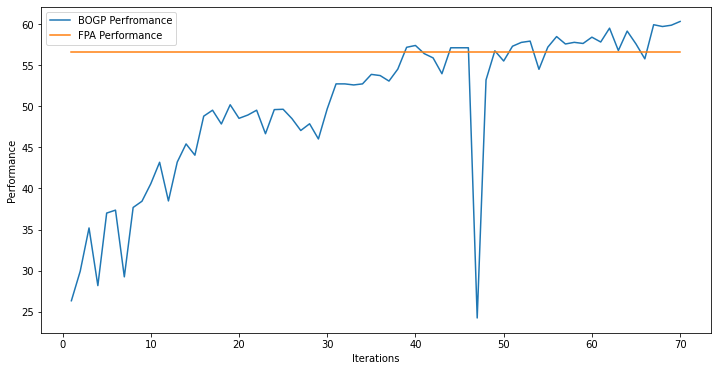

x_next is [ 26.79766852  29.77118661  19.18854622  22.53165502  27.2540544
  26.63978424  29.83104673  29.60166087  29.52651372 -30.99072534
  19.4889238   29.71471257  29.9094272   29.82777546  29.94649062
  25.52067974  29.88949887  29.45388233  25.88767795  24.59726549]
f()=60.025069, actual=61.160
1


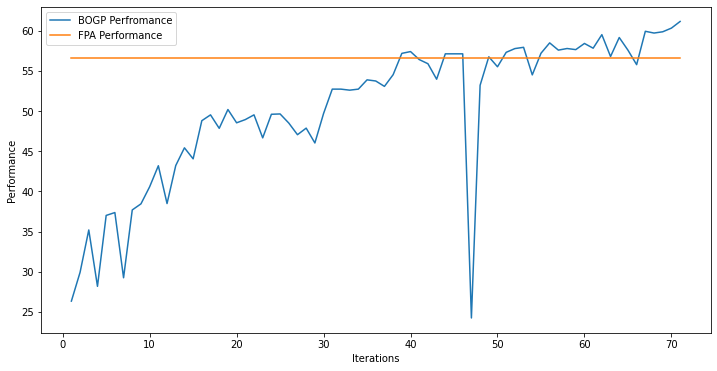

x_next is [ 28.84950791  29.97546533   7.02505793  19.79145814  29.90474528
  29.14659356  29.9598097   29.97696316  29.92372097 -30.97969568
  17.20229326  29.82563341  29.92584426  29.97762366  29.96806522
  23.32299766  29.88747211  29.69949271   6.08932539  18.96333428]
f()=61.343751, actual=57.758
2


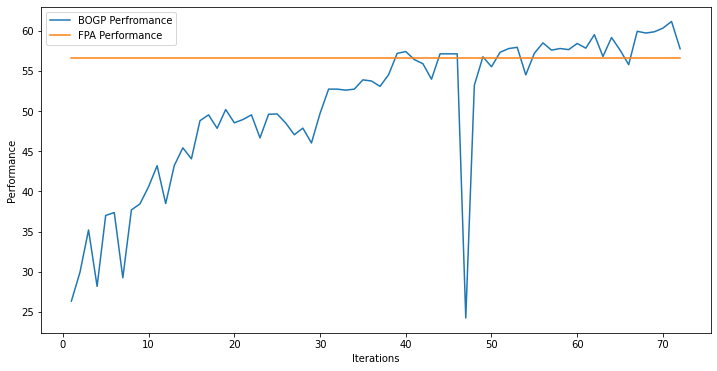

x_next is [ 27.68122444  29.96207923  19.03341825  23.17382923  27.43679358
  28.09258023  29.96911252  29.3648071   29.50994047 -30.8965408
  18.45452998  29.61725977  29.76654779  29.54199828  29.8644556
  24.05259313  29.61843285  29.89494991  23.97084301  22.51431474]
f()=61.172952, actual=60.690
3


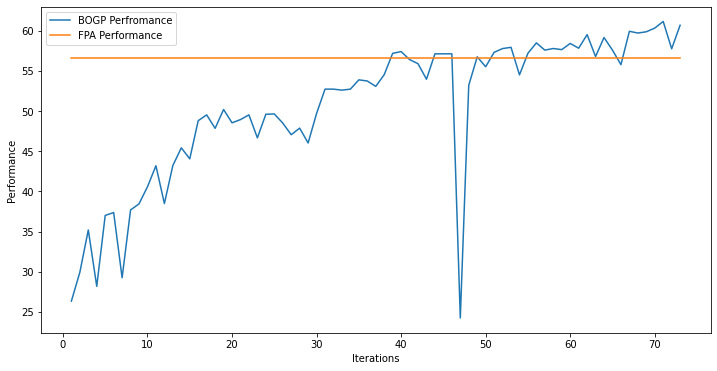

x_next is [ 25.42854429  29.86464041  17.73855143  21.55786601  29.36574485
  25.49445889  29.87478399  29.95336831  29.37026437 -30.94876858
  19.20590206  29.7894026   29.75203847  29.99817198  29.92932586
  27.19088372  29.98648625  27.51507255  23.1067129   25.04408382]
f()=61.257743, actual=61.875
4


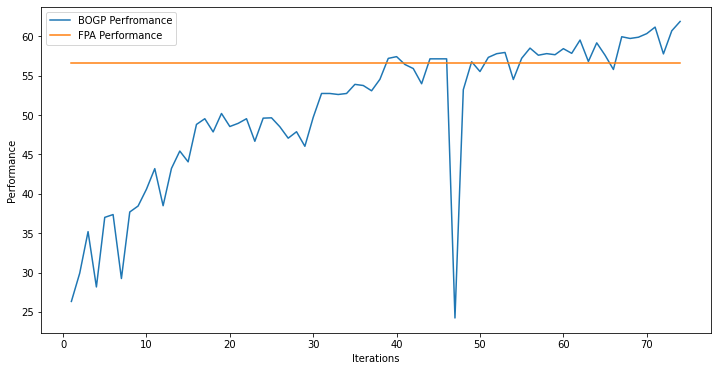

x_next is [ 24.97649513  29.9698066   16.1364525   22.21455579  29.56291853
  23.60692511  29.9231505   29.98706485  29.33750381 -30.873701
  18.06494945  29.91958683  29.97552211  29.92916758  29.9902998
  28.39081221  29.77776615  28.08315184  22.18219622  25.98005757]
f()=61.927478, actual=61.594
5


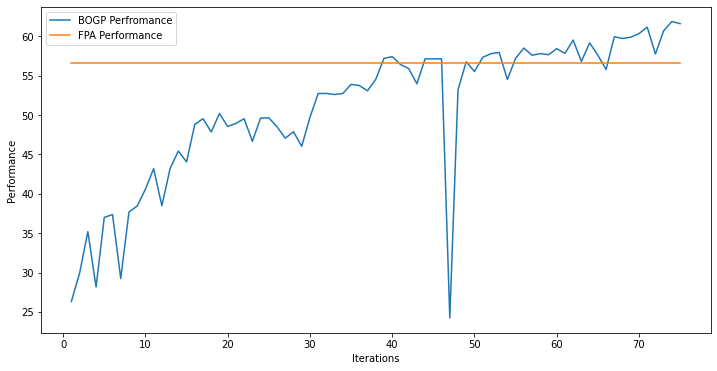

x_next is [ 24.83475601  29.96292479  18.44313955  19.86861868  29.57569738
  24.90793236  29.93280507  29.95459244  29.87276969 -30.99364542
  19.76557077  29.80107475  29.8031574   29.92241426  29.98343018
  26.56122491  29.79603745  24.89729452  22.07669562  24.60922783]
f()=61.975711, actual=62.447
6


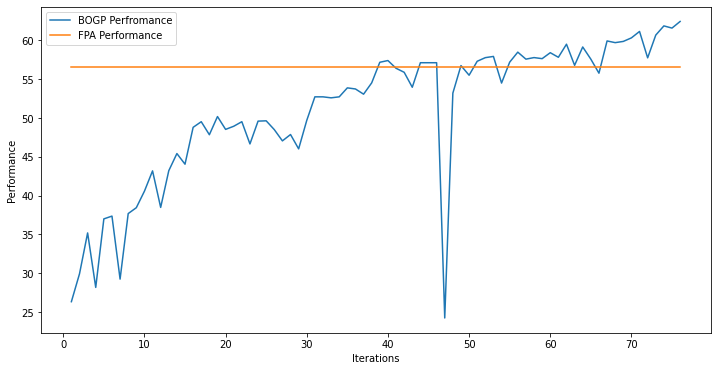

x_next is [ 25.74265438  29.91479269  15.22542152  17.51213316  29.69315174
  22.33989093  29.78886398  29.90465901  29.90528833 -30.93042654
  19.70797955  29.88880254  29.84157225  29.96450814  29.96864535
  26.97372052  29.99829037  15.46063238  20.04894121  22.11191744]
f()=62.345191, actual=60.803
7


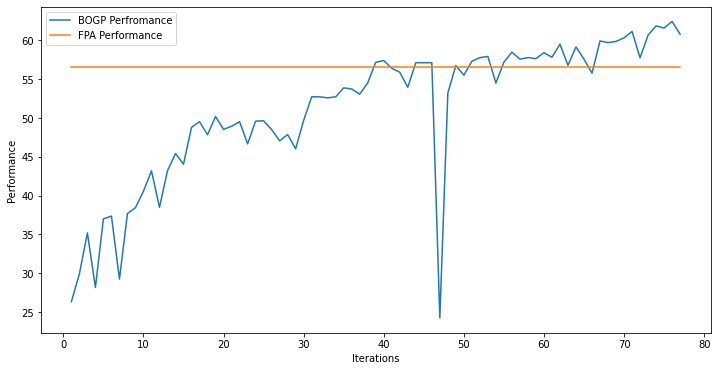

x_next is [ 24.80337803  29.98786906  20.20367707  18.84567434  28.74707139
  24.46426619  29.95120704  29.98360078  29.98676608 -30.95617822
  20.74296247  29.8334323   29.84073935  29.92433178  29.85605211
  26.11795231  29.27994604  24.13032395  18.9269675   25.57722569]
f()=62.533730, actual=62.630
8


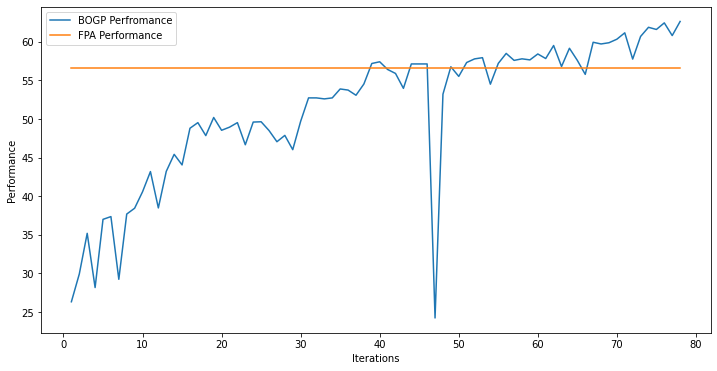

x_next is [ 24.6148497   29.99999997  20.46689902  19.06302064  29.76592417
  24.40631738  29.99999989  29.99999997  29.99995724 -30.9999316
  20.97370197  29.99999985  29.99999993  29.99993507  29.99999997
  25.71781268  29.99999794  24.42888175  19.49723744  25.59582775]
f()=62.761776, actual=62.704
9


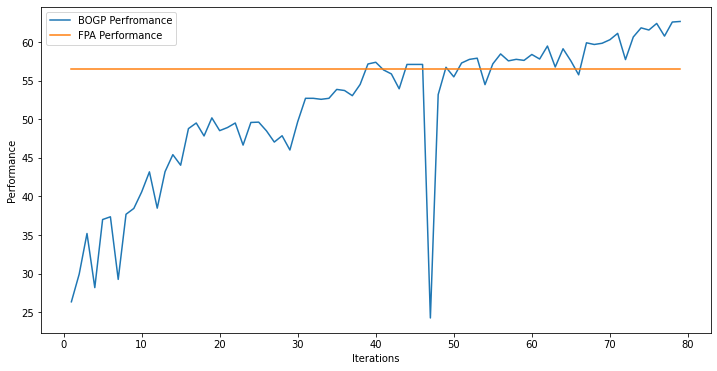

x_next is [ 24.97747584  29.8746062   20.20179872  18.74327008  29.60528263
  24.18574577  29.9983126   29.90945408  29.93378858 -30.94522818
  21.8638172   29.99250481  29.80678701  29.68148444  29.82192083
  26.64880348  29.81120977  24.34046385  18.9166453   25.16409606]
f()=62.556851, actual=62.388
10


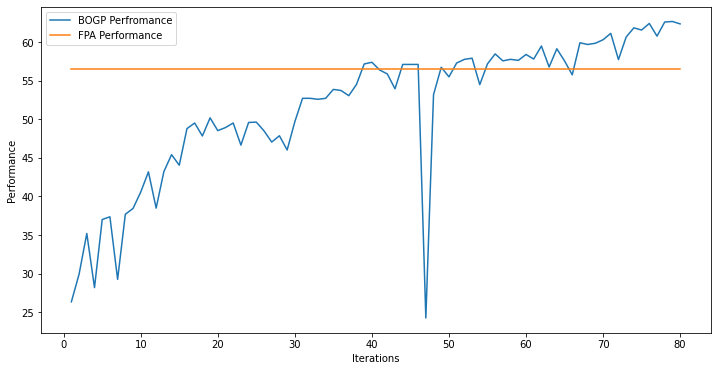

x_next is [ 24.49805814  30.          20.30985819  19.31886389  28.9510051
  25.16921437  29.99999994  30.          29.99970367 -30.99997075
  19.12695743  29.99988493  29.99999997  29.99996856  29.99999995
  24.8057815   29.82249871  23.6695727   19.51543915  26.77148198]
f()=62.851235, actual=62.790
11


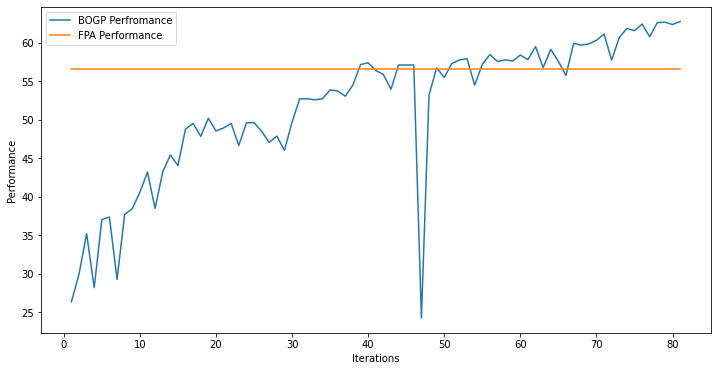

x_next is [ 24.42143362  29.99300744  20.24788718  19.05170595  28.92517768
  25.01310336  29.91432145  29.92207578  29.69385569 -30.95585393
  19.50668016  29.80803089  29.93858617  29.96048086  29.85337279
  25.05816795  29.26840504  24.50101321  19.45106239  25.70857359]
f()=62.702622, actual=62.815
12


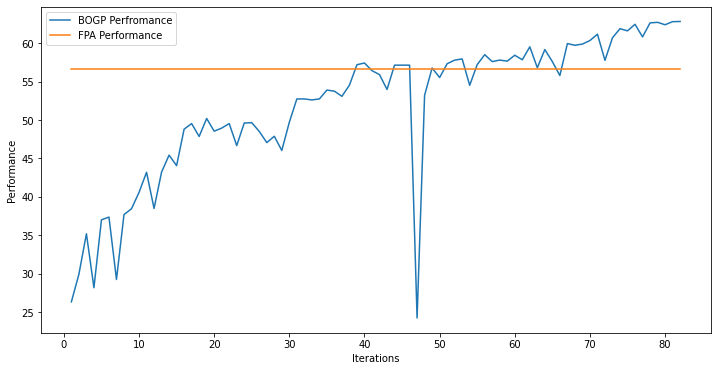

x_next is [ 23.81693897  29.99999998  20.57934469  18.42098899  29.55392782
  24.83550381  29.99999978  29.99896303  29.55300433 -30.99971234
  18.71078493  29.99965971  29.99999994  29.99999996  29.99999988
  23.86401136  28.55587446  24.62394409  19.23735554  25.36438261]
f()=62.938146, actual=62.990
13


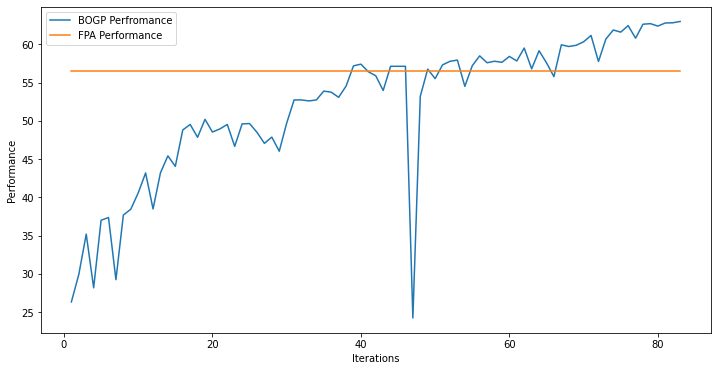

x_next is [ 23.33774701  29.99876383  20.64789815  17.59794961  29.87137754
  25.57084678  29.57732949  29.86254373  28.89568734 -30.84644089
  18.61925724  29.8036045   29.95660958  29.88577201  29.85255075
  22.67935533  29.34727573  24.86220501  19.04898311  25.63129042]
f()=62.783765, actual=62.702
14


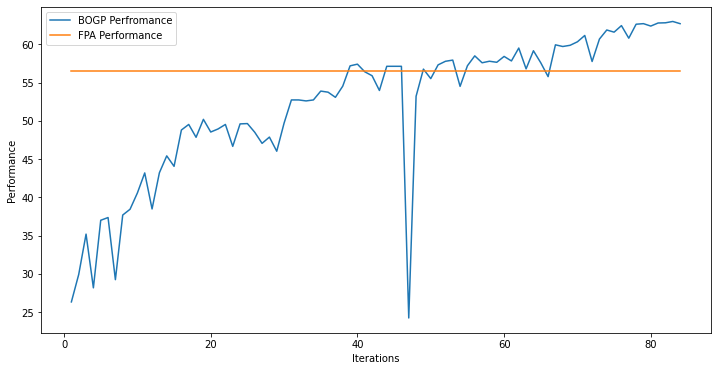

x_next is [ 23.80788581  29.99966358  20.85028484  18.47438893  29.91062716
  24.45632118  29.99999997  29.9977931   29.78848753 -30.99999981
  18.33495116  29.99999975  29.99999996  29.99941818  29.99731005
  24.0675143   27.69251266  24.50752291  19.12022996  25.19523331]
f()=63.017314, actual=63.015
15


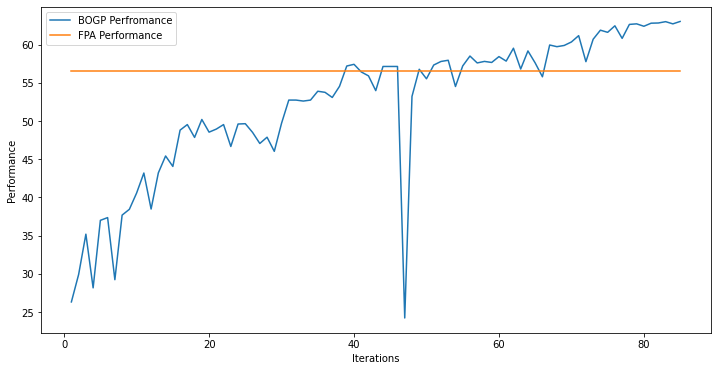

x_next is [ 22.84355999  29.80391977  20.8751145   18.60520195  28.5019492
  24.56429468  29.97885608  29.90132222  29.53927178 -30.93642352
  18.62625674  29.99815907  29.83632473  29.86527934  29.91486494
  23.87914329  27.0851978   23.36247441  19.25200368  24.12549037]
f()=62.790456, actual=62.942
16


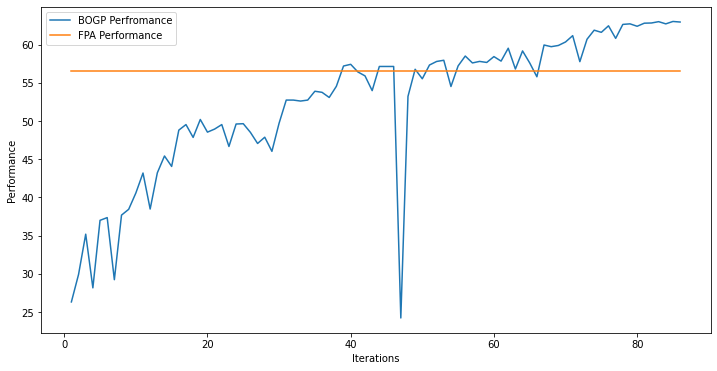

x_next is [ 21.49130109  29.85283111  20.76385091  19.24715962  28.74653365
  23.91180646  29.77870783  29.98951958  28.60127452 -30.86420066
  18.27081358  29.70053257  29.97995176  29.86369741  29.74709111
  22.90846398  26.46137823  24.06035011  17.21687339  23.81230156]
f()=62.789584, actual=62.430
17


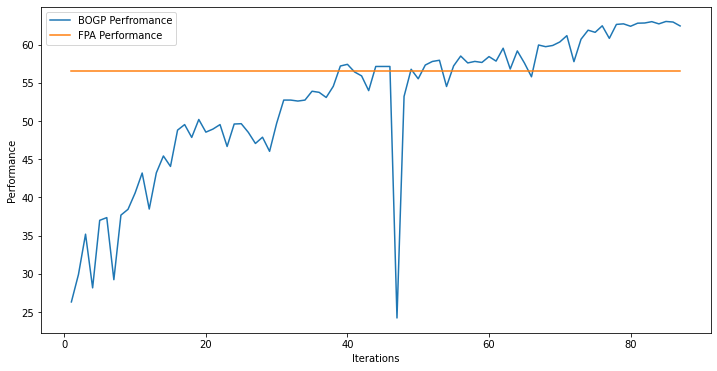

x_next is [ 24.6797724   29.92210409  22.69817264  18.12470285  29.41651105
  24.43778082  29.70751112  29.884683    29.19234197 -30.91369654
  18.84132599  29.91806147  29.79665817  29.83815264  29.91400823
  24.26215661  27.69255574  23.8357631   19.96876105  24.50758544]
f()=62.881200, actual=63.131
18


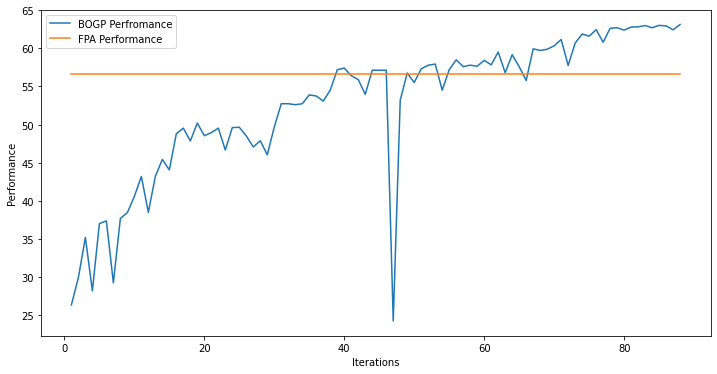

x_next is [ 24.16734108  29.9145071   24.62579602  18.11340137  27.29294213
  24.68977857  29.92425843  29.95570855  29.85140435 -30.95757478
  17.04092985  29.84439503  29.99238845  29.74118841  29.58771283
  23.71293656  26.54992811  23.43584165  18.61511161  24.07102496]
f()=62.986507, actual=63.240
19


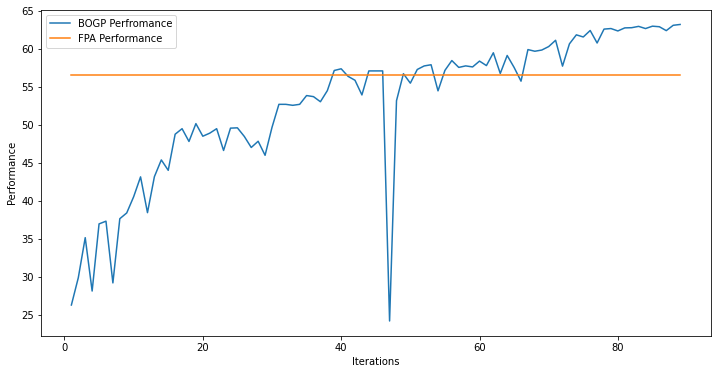

x_next is [ 24.65416526  29.99999995  24.92290172  17.10912673  28.25435954
  24.86216404  29.99999996  29.99999998  29.99999351 -30.99999982
  17.15060191  29.99999997  29.99995738  29.99999995  29.99999992
  24.0649729   27.6186147   22.9592317   19.11348405  23.32061504]
f()=63.450613, actual=63.169
20


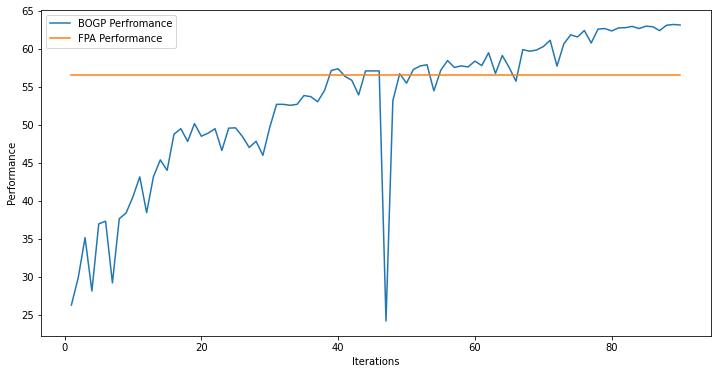

x_next is [ 18.43897028  28.2272371   -0.7959047  -24.99162018  19.9029641
 -22.21828388   7.27001916  -1.90557008  15.03005054  -9.66170099
 -10.83312777  -7.88881014 -27.79226059 -15.81593365 -19.82171503
 -15.21405507 -19.89499997  18.98080371   0.74224996  11.51192074]
f()=24.520255, actual=31.221
21


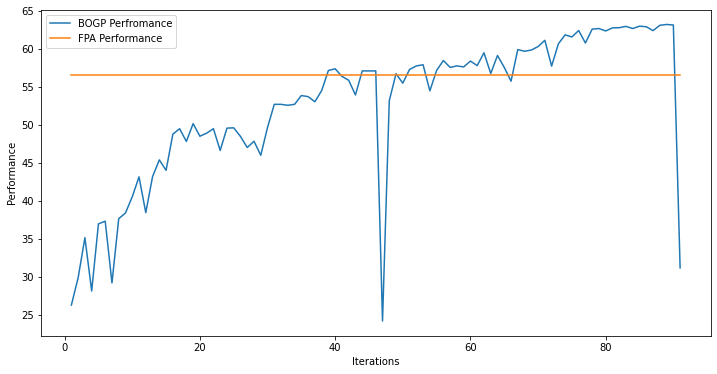

x_next is [ 24.86181211  29.92770604  24.82274453  18.36349578  27.73247876
  24.16913829  29.98399035  29.95415329  29.72496432 -30.95597597
  17.68811726  29.92307511  29.98106246  29.7292369   29.99156827
  22.67256285  25.60927583  23.15149164  18.83200436  25.2416708 ]
f()=63.325167, actual=63.486
22


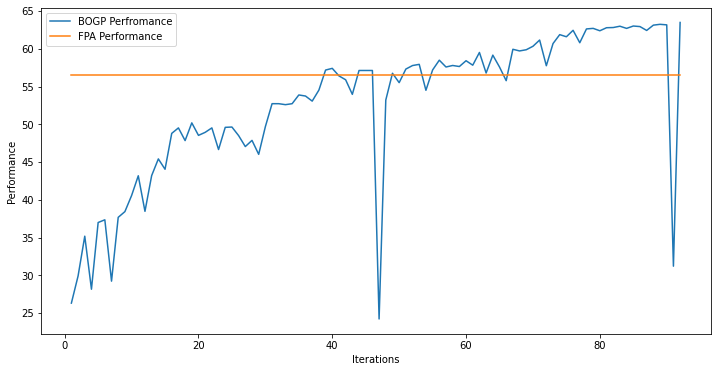

x_next is [ 25.59801259  29.58371672  26.68561641  17.12355026  26.42856688
  23.64275789  29.87574628  29.96314797  29.83510925 -30.63942154
  18.49653279  29.46220465  29.91565734  29.31292392  29.92986187
  20.67607175  24.21523494  22.60829313  18.04085874  24.8203748 ]
f()=63.238098, actual=63.435
23


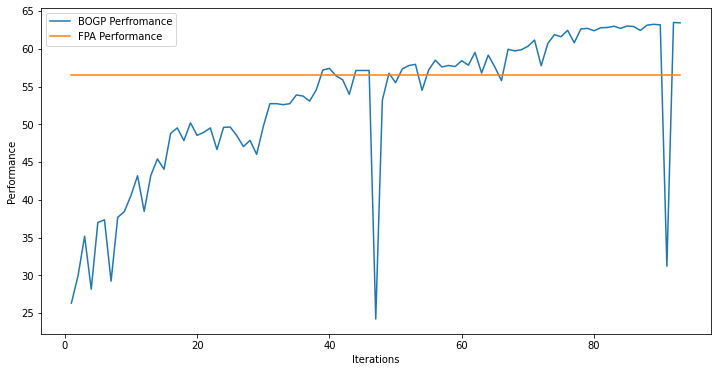

x_next is [ 26.87232644  29.8156398   27.13657859  16.36844997  25.96570456
  23.60540757  29.99777157  29.94447842  29.98292439 -30.9874917
  17.69536151  29.50296943  29.75107931  29.66604609  29.96791799
  19.77124767  22.06133653  22.92268448  16.46379152  24.53894787]
f()=63.417777, actual=62.780
24


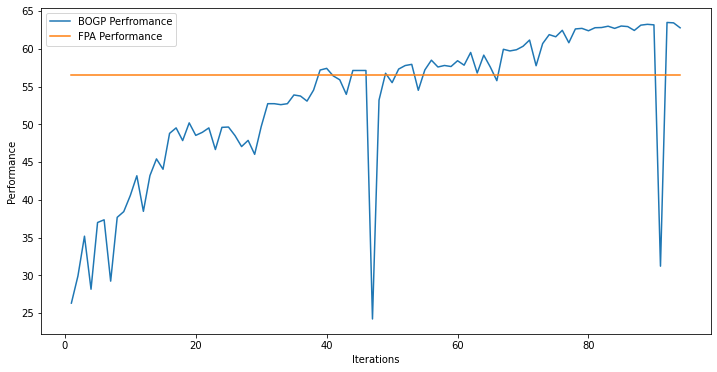

x_next is [ 25.41467845  29.96532232  26.52392174  18.19700427  26.35423987
  23.2386019   29.85340133  29.97752119  29.36275335 -30.91087108
  20.0646823   29.79829817  29.96555249  29.32703508  29.98990241
  20.90203928  26.74348544  22.42288259  19.69118864  25.45193032]
f()=63.611965, actual=63.694
25


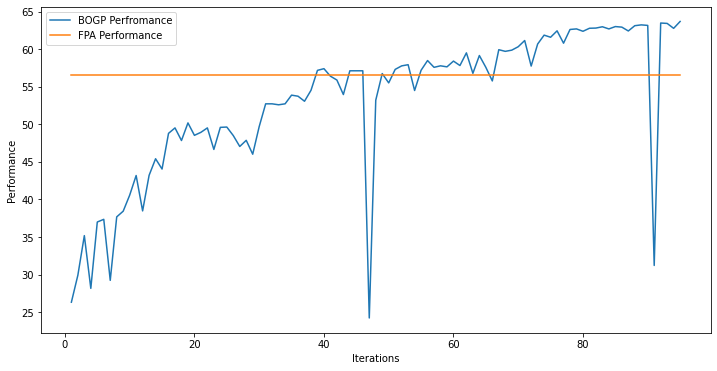

x_next is [ 24.5968751  -27.1370563   26.30038898  26.03272489  -2.2263322
 -22.33659941  -8.70695691  15.66333874   9.53669211   2.60328962
  11.59957085   9.40945135 -13.5751367   23.5332864  -21.32574431
 -10.04701241 -18.87016944 -23.65091859   9.74592304 -14.33876917]
f()=53.032862, actual=29.291
26


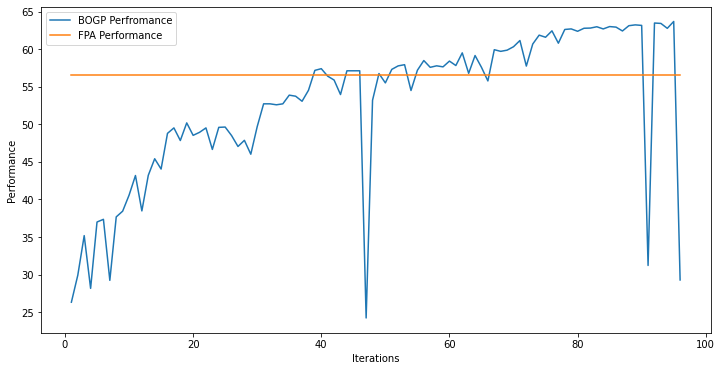

x_next is [ 25.16021797  29.99981467  26.33102884  18.13133424  26.65755919
  23.16311994  29.99966594  29.9987212   29.99894432 -30.99871634
  20.04148794  29.9998177   30.          29.58269928  30.
  20.72488083  26.27748391  22.22581694  19.44536755  25.15879053]
f()=63.768388, actual=63.735
27


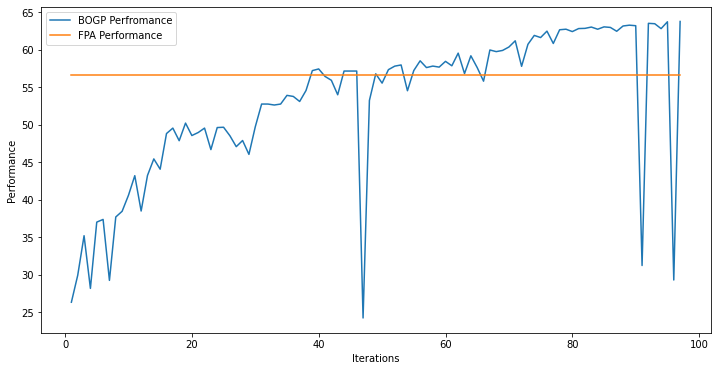

x_next is [ 24.68639732  29.82342196  26.71544237  17.73167757  26.64406777
  23.10302408  29.9444078   29.98948923  29.91628108 -30.85334663
  19.43098804  29.99843298  29.96140241  28.68694966  29.98500837
  20.71124114  26.46131036  22.09660605  19.2074838   25.33767042]
f()=63.687909, actual=63.793
28


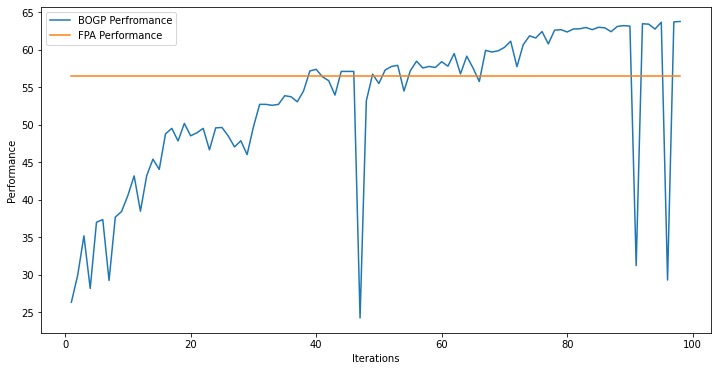

x_next is [ 24.84319871  29.99999999  26.79940683  17.84963787  26.7984974
  22.75674455  29.99573609  29.99918755  29.99944835 -30.99777956
  19.04372699  29.89150512  29.99953093  27.52135418  29.99635397
  20.63596182  26.53315085  21.94769251  19.06464266  25.55315565]
f()=63.855837, actual=63.854
29


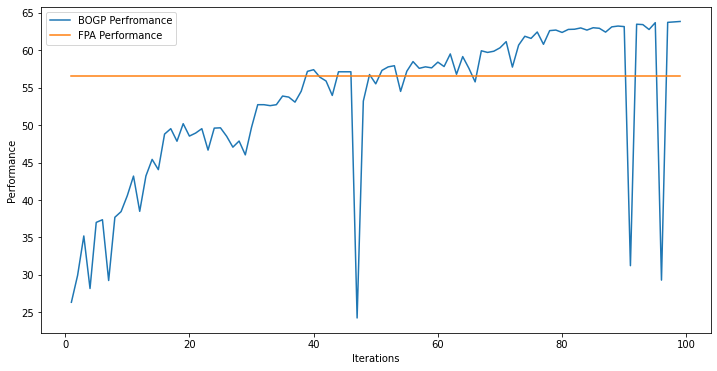

x_next is [ 28.26205393  29.97717549  29.90009613  29.21143129  29.69289945
  29.25688542  29.99355019  29.9598849   28.67402485 -30.65491691
  29.10790079  26.28418512  29.97744989  28.59554685  29.98517613
  29.76895211  29.71724515  29.39883259  27.18707815  26.82219221]
f()=53.118142, actual=57.599
30


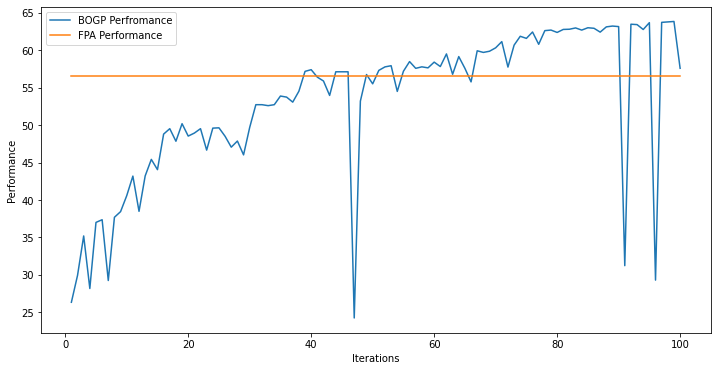

x_next is [ 29.91508299  29.97109674  29.99524293  29.96973652  29.98218097
  29.95508518  29.99628295  29.95282247  29.95198188 -30.92779685
  29.92180753  29.90040053  29.96672376  29.93782731  29.98756531
  29.91428098  29.96440432  29.98327084  29.97828168  29.97252875]
f()=53.163113, actual=57.126
31


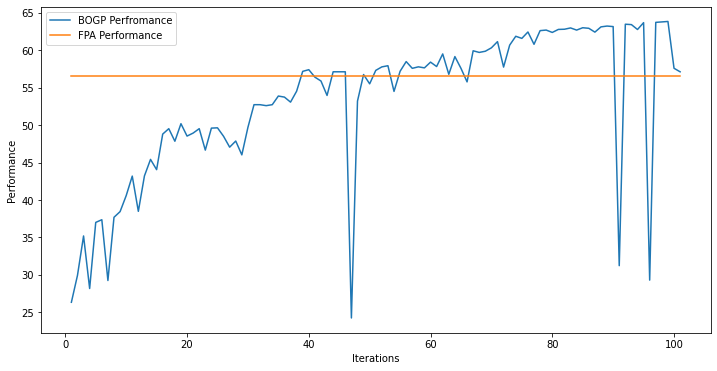

x_next is [ 24.5377366   29.79522351  27.85948442  17.42025465  26.90589201
  22.75889737  29.96731616  29.93797044  29.37484507 -30.84368684
  18.899748    29.96224399  29.95356835  26.82861535  29.52942659
  20.34350802  27.07843047  21.71193317  19.16509607  25.59634326]
f()=63.705931, actual=63.768
32


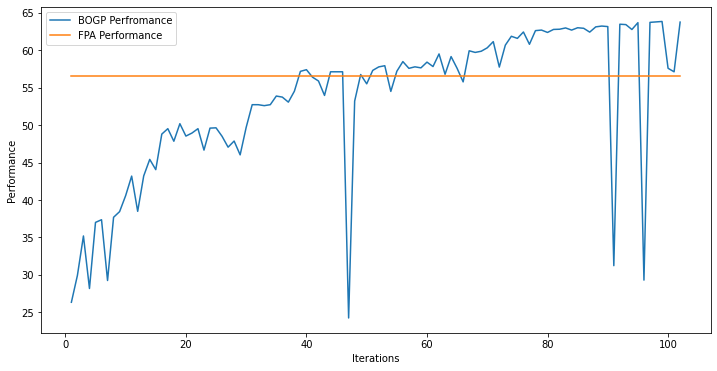

x_next is [ 24.36968501  30.          27.05281036  17.24606471  26.86836948
  23.76586651  30.          30.          29.83693372 -30.99315925
  19.07840338  29.94553447  30.          27.20379831  30.
  20.21563062  26.6561305   21.64690312  19.86806639  25.46776773]
f()=63.831241, actual=63.717
33


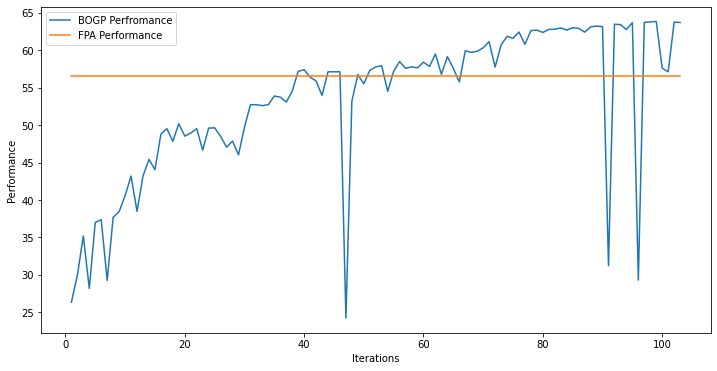

x_next is [ 24.57895783  29.94621739  27.90835501  17.75094648  26.38656341
  21.84341147  29.75246551  29.99062869  29.93217612 -30.64714938
  19.28034815  29.96626207  29.92086248  27.62617207  29.80694737
  21.11357237  26.1492843   22.0608925   18.4835244   25.53192808]
f()=63.796599, actual=63.951
34


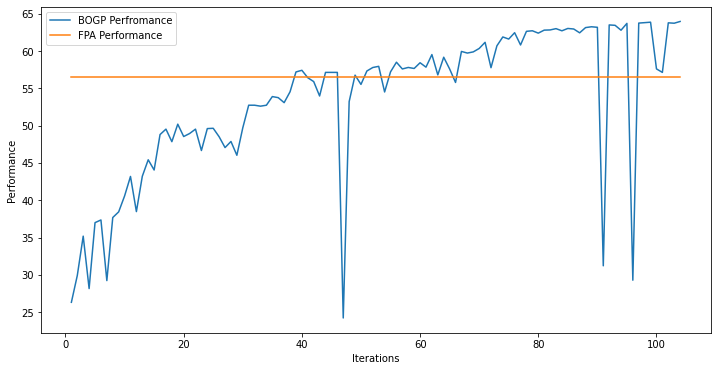

x_next is [ 24.38716068  29.99995891  29.29622965  17.74985261  26.29173232
  20.89992884  29.99999979  29.99999998  29.99999599 -30.99999887
  19.37359905  29.99999996  29.99999998  27.52412501  29.99999985
  21.42426124  26.20572217  21.58696045  18.02157985  25.75307372]
f()=64.068440, actual=64.084
35


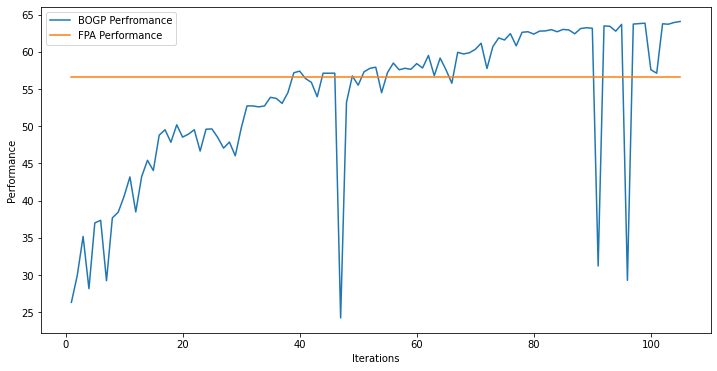

x_next is [ 23.94240952  29.88183315  29.72509423  17.56821766  26.76752771
  20.60935886  29.7882245   29.9502564   29.78066873 -30.71242409
  19.29137919  29.91745085  29.9587659   27.75080359  29.92606086
  21.09139303  26.28104593  21.53454673  17.77746886  25.98984351]
f()=64.004846, actual=64.043
36


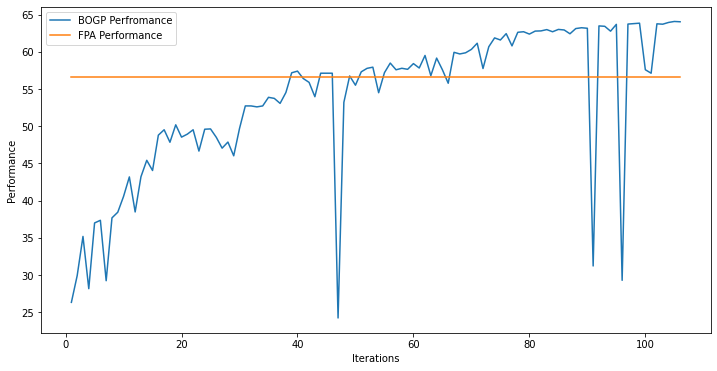

x_next is [ 24.21440272  29.89388337  29.90231197  17.37702197  26.54798263
  20.91461329  29.76830557  29.86934591  29.69671472 -30.73524461
  19.61356305  29.9795535   29.90622354  28.17346888  29.99323131
  21.34182956  26.69730068  22.16817574  18.28220895  25.56582299]
f()=63.993277, actual=64.192
37


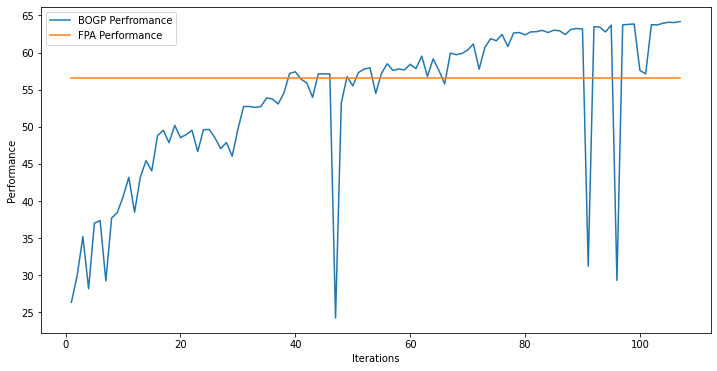

x_next is [ 24.38790819  29.99999996  29.99999991  17.01588479  26.92391099
  20.4950291   29.999891    29.99999999  29.99995373 -30.99996986
  19.77781879  29.99999995  29.99999996  28.4048516   29.99999996
  21.2014221   27.31850485  23.57990273  18.38998455  24.87803677]
f()=64.357142, actual=64.236
38


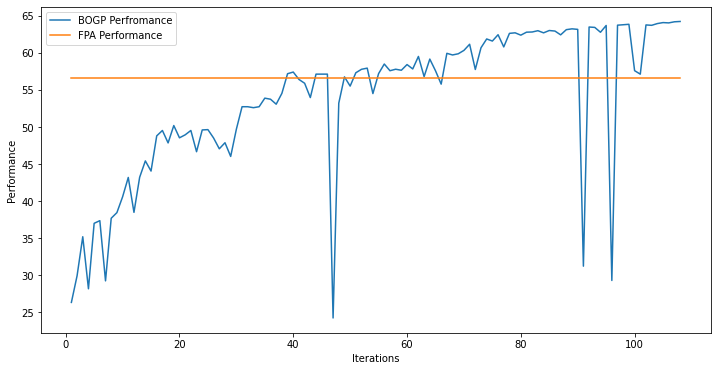

x_next is [ 18.01784018  22.32019501  21.37752721  -7.90896093 -27.89371772
  23.36247697  21.7142687   17.89938623  -4.47801472  -8.53480536
   6.49166645  21.18482204  -8.14622902  28.18752424  -3.39288204
   3.18970577 -12.83399932  -8.36374499  -2.77188041 -12.97356238]
f()=36.752895, actual=36.412
39


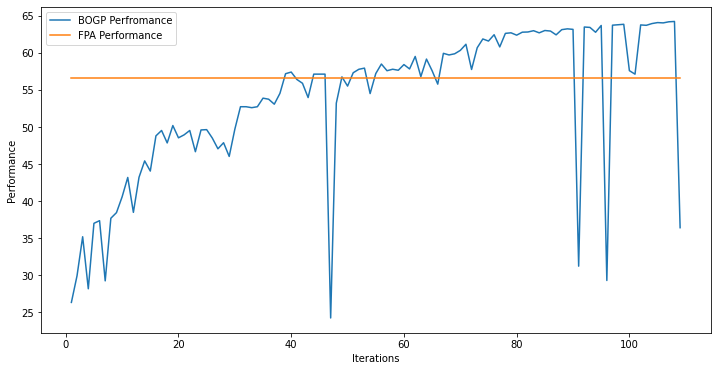

x_next is [ -2.04256787  -5.95856472 -26.95675114 -16.18985632  24.83556868
 -21.43507286   9.0670439    2.78885995 -19.58091632 -21.0245694
  26.15252529 -11.61160904 -20.72462109  16.71761343  20.90224573
 -13.4325489   27.12220915  27.69573455  15.82978177  26.06074513]
f()=53.741530, actual=33.522
40


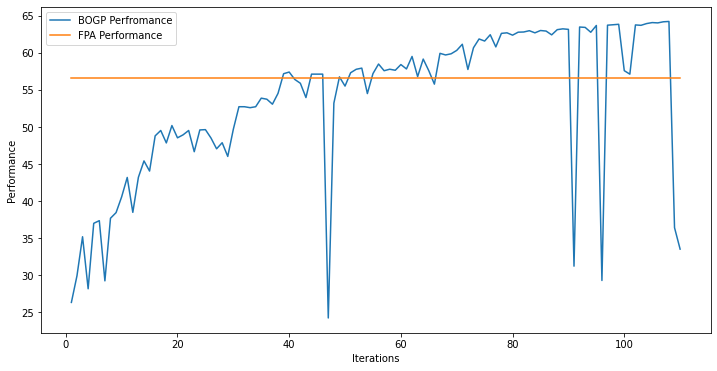

x_next is [ 24.44761154  29.9669882   29.80341457  17.25295899  26.38385899
  21.39679398  29.7396534   29.94941028  29.97271241 -30.99191531
  19.08217099  29.95328924  29.99932516  28.57488246  29.97655138
  21.56639407  27.00130282  22.72405655  18.6468963   25.2878623 ]
f()=64.233025, actual=64.240
41


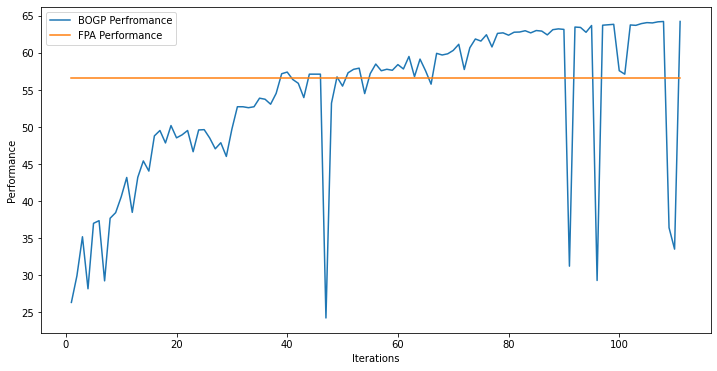

x_next is [ 24.45034808  29.87318734  29.6373486   18.26151146  27.6931051
  21.94453528  28.49086987  29.92691567  29.97709745 -30.54811255
  18.60487223  29.78130622  29.96233629  29.44719966  29.86958215
  20.73275923  27.34221066  21.72404008  17.82877792  25.37339099]
f()=63.968565, actual=63.833
42


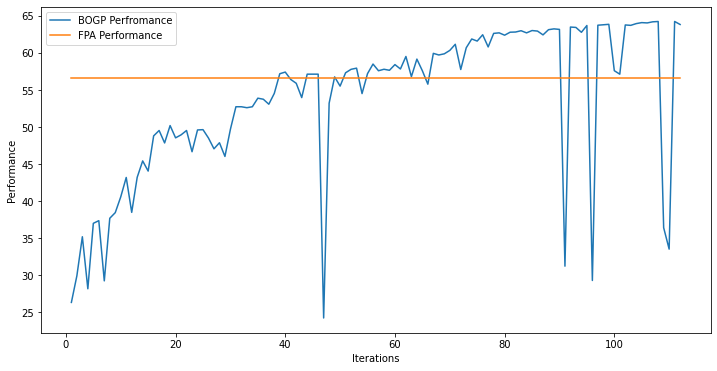

x_next is [ 29.82372526  29.96440525  29.91447292  29.92569193  29.9469904
  29.83642199  29.87067958  29.98724054  29.96208565 -30.97077526
  29.73644289  29.87555997  29.9944855   29.69813868  29.83495643
  29.99178777  29.79510548  29.97277014  29.92380882  29.96020084]
f()=53.744356, actual=57.128
43


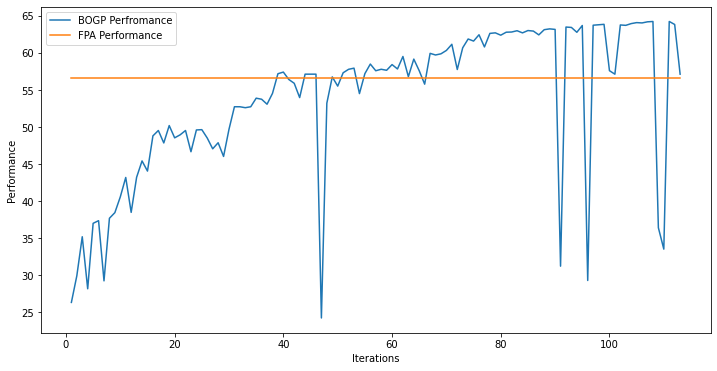

x_next is [ 24.36184289  29.85083528  29.6811414   16.59418397  27.12748891
  20.45402564  29.79863019  29.73003494  29.09444817 -30.55943159
  19.32539201  29.64849411  29.93333457  28.80391905  29.9676545
  21.48227695  26.54820615  23.97195798  19.24703166  25.90089226]
f()=64.080749, actual=64.171
44


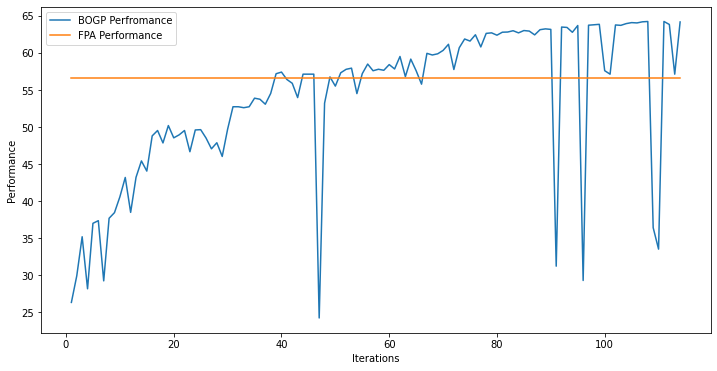

x_next is [ 24.48428037  30.          29.99175544  17.05828673  26.84579669
  20.58658606  29.99821009  29.96691709  29.56539476 -30.96865041
  19.29432148  29.99980274  29.99999999  28.96288691  30.
  21.65314435  26.76698434  22.42879634  19.04738701  25.68140443]
f()=64.308483, actual=64.218
45


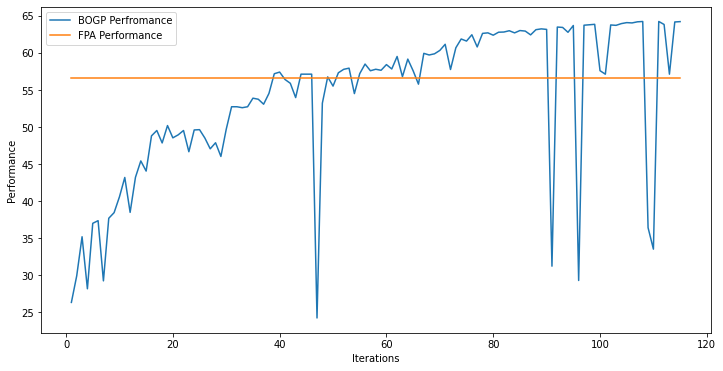

x_next is [ 23.90950343  29.98949491  29.59077811  16.97901685  26.04919199
  21.24158584  29.97963471  29.95875604  29.03498006 -30.83127477
  19.78744563  29.91441993  29.97993151  28.42144114  29.84316591
  21.73187429  26.31352758  24.30250033  18.14509162  26.41103778]
f()=64.210177, actual=63.973
46


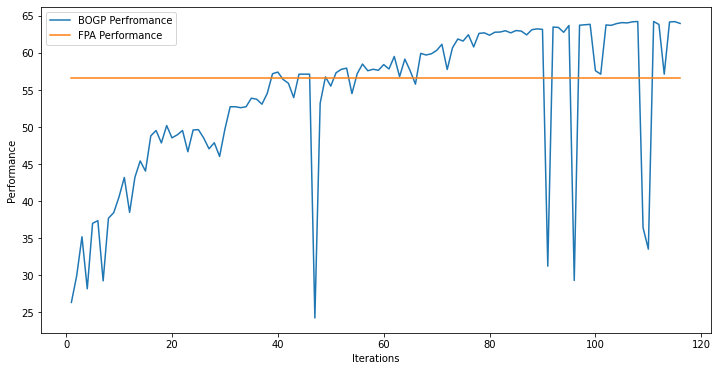

x_next is [ 24.37975781  29.99999997  29.99999987  16.99545628  26.69008202
  20.55050925  29.99995281  29.3867546   29.99999983 -30.58842537
  18.85230079  29.58153229  29.99999991  28.02064632  29.99999997
  21.32017917  26.83878617  23.04087567  19.25605811  24.81792259]
f()=64.331298, actual=64.552
47


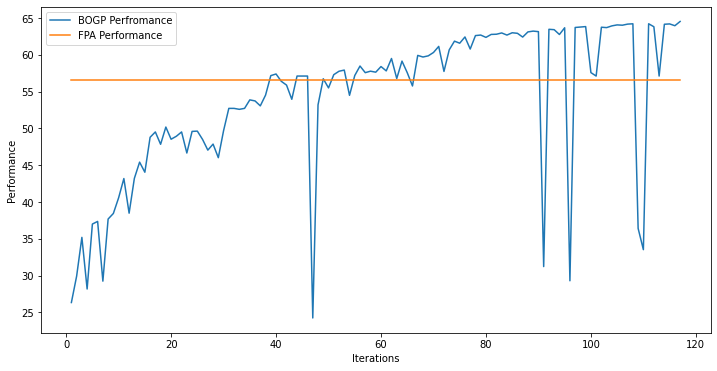

x_next is [-30.51421063  25.96833996 -19.26901999  26.54392454  18.73385962
   8.74513132  17.27923189  13.70971011  21.29611252 -22.4962948
   6.60711844 -24.33951579   8.13535248  -3.64656411 -12.99374659
  16.04571093  13.32159138  -6.11465628 -28.29682815   1.65289528]
f()=24.112284, actual=30.844
48


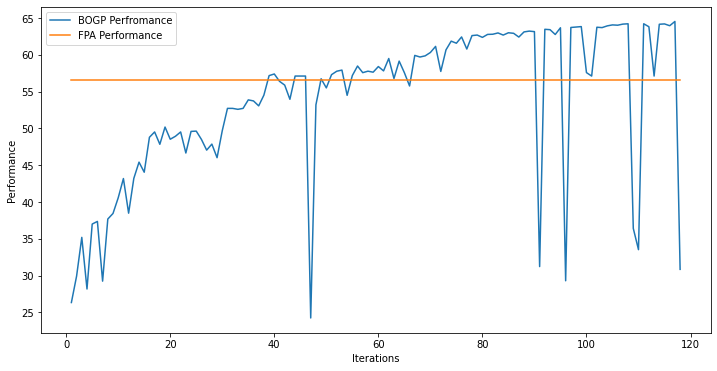

x_next is [ 23.60667192  29.99208344  29.96713709  16.82388591  26.37600213
  19.06560575  29.98069684  25.07824469  29.65316346 -28.74114028
  17.94257205  28.83893371  29.95215665  27.92407738  29.9851296
  20.41620121  27.43766897  21.96666316  18.84378899  23.39138666]
f()=64.822307, actual=65.186
49


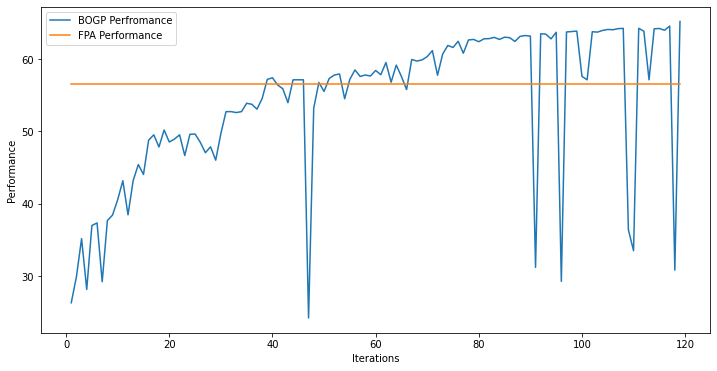

x_next is [ 24.72330948  29.99849523  29.91103879  16.41827375  26.36364302
  18.45023789  29.97839362  21.1042415   29.97438292 -29.96310164
  16.59135145  28.08003135  29.96913755  28.69917571  29.92910457
  20.33602542  27.06953491  21.14107457  17.36385967  22.93767872]
f()=65.065402, actual=65.120
50


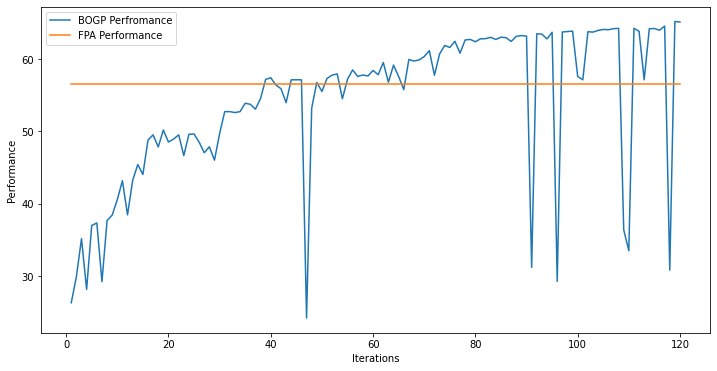

x_next is [-10.3802364  -24.1438413  -19.10638595 -24.6350475  -26.89511451
  14.83688862  -3.64272871 -24.26346457  19.89933509  -0.9934722
   7.00561208  14.81163865  15.70234504 -17.82866579  -5.73250947
  -8.72597959  -8.20260222  -1.52504105   8.9861387   -0.23279209]
f()=54.120945, actual=27.056
51


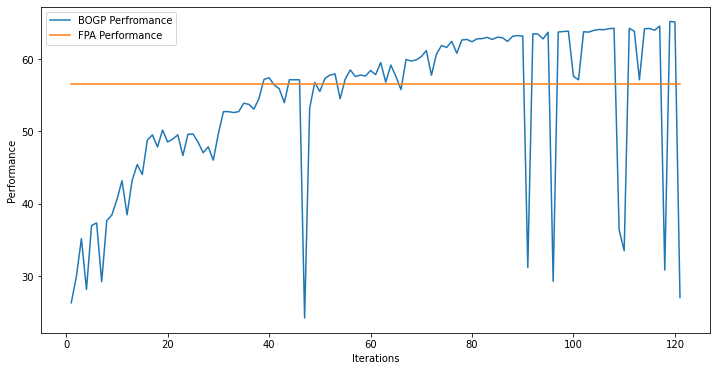

x_next is [ 23.63492771  29.9693803   29.83044162  17.04127689  26.68649769
  18.74202881  29.87664656  23.0573359   29.71382907 -30.11232921
  15.98670165  27.72436751  29.84016739  27.71568925  29.88974356
  19.91085119  26.98873255  21.4039146   18.00958652  24.02685467]
f()=65.100348, actual=65.191
52


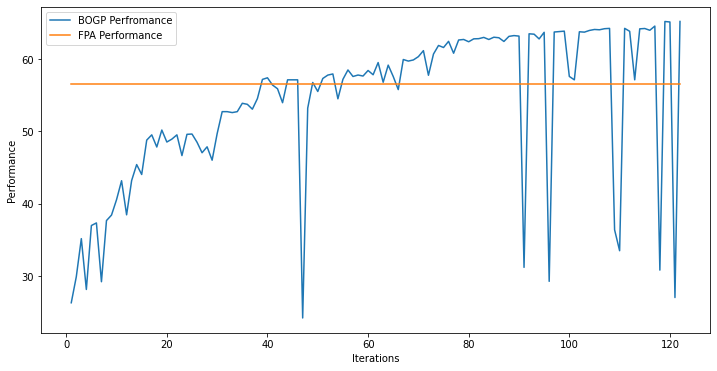

x_next is [ 23.45448613  29.98453242  29.86522667  15.66153245  25.53218537
  17.44660709  29.97448969  22.55293516  29.75035064 -29.80726833
  15.22620645  28.5019498   29.89957059  27.49717989  29.98128383
  19.06513448  27.132174    21.13089867  18.15854746  23.64445336]
f()=65.168350, actual=65.197
53


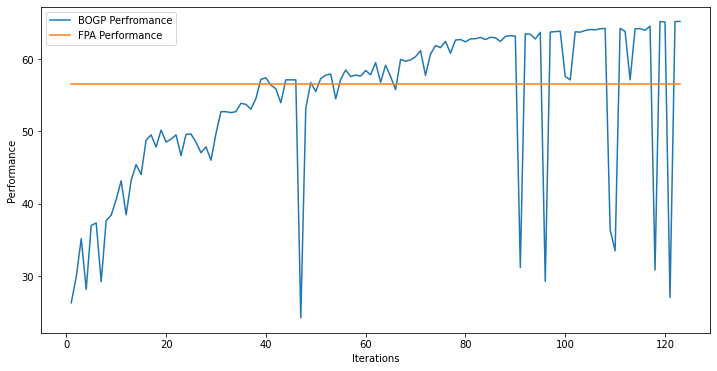

x_next is [ 23.5322346   29.93062731  29.88059796  16.26106128  25.973131
  18.82774829  29.95072285  22.71543346  29.93509843 -29.99235833
  16.48107368  28.40742929  29.97490422  28.00145725  29.8398384
  20.39364161  27.28516618  21.51137909  19.39100882  23.38889486]
f()=65.226581, actual=65.269
54


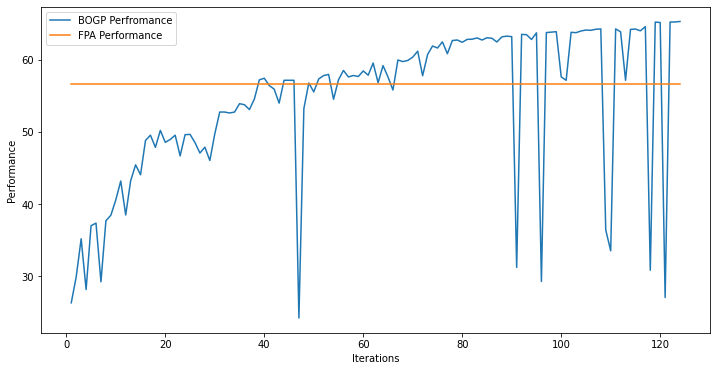

x_next is [-12.51687075 -13.92156328  -5.80666656 -12.29185881 -25.2593385
  -5.86938685   0.74942929   6.10720825  21.37516478  15.81088099
  -1.12685379   5.8863769  -17.98122527   5.60063057 -27.57182805
   6.7853166    7.16530049  -6.94457358   0.4266831   -5.52347331]
f()=54.170381, actual=25.186
55


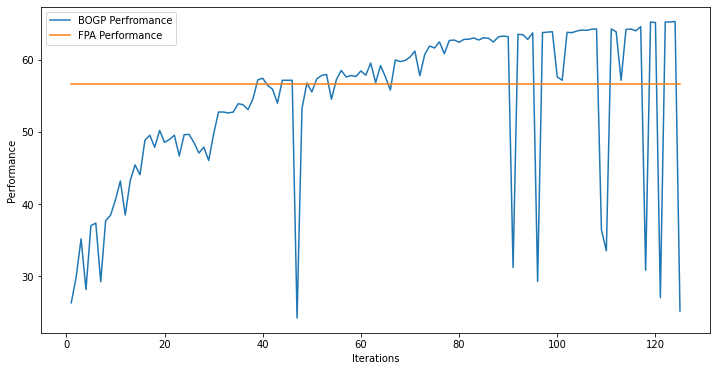

x_next is [ 23.18699259  29.95333929  29.96104811  16.59557014  26.47465183
  18.59462697  29.93295114  22.92070651  29.89024732 -29.79461963
  16.46844169  29.04789292  29.98647248  27.40797483  29.95219657
  19.87751077  27.01716169  22.12607418  19.11397872  23.05290554]
f()=65.293948, actual=65.276
56


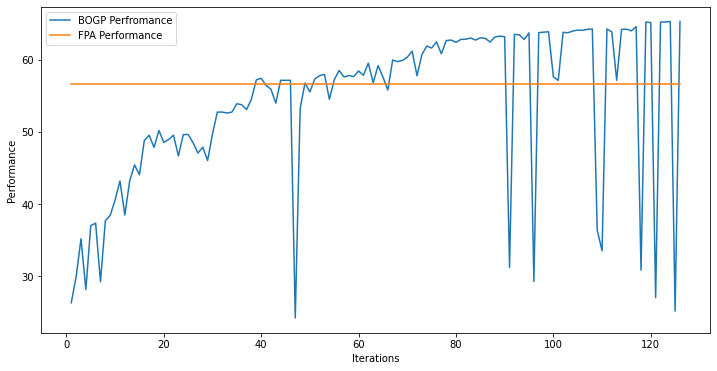

x_next is [ -3.03255658   6.730432    24.62578396   0.26668378  15.3496118
  13.82132059  -1.88347851  24.39843105 -11.45117091  -8.29417982
  19.21486907  -9.16310909 -18.78802352   0.5655529    5.27711464
 -30.1064441  -26.90095904   5.47726144 -21.35813042  21.34118251]
f()=37.172319, actual=29.935
57


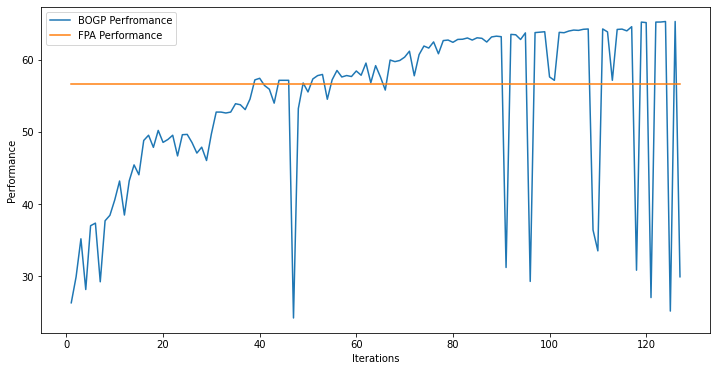

x_next is [ 23.48962455  30.          29.98227625  16.68363282  25.85971778
  18.92361443  30.          23.20188168  30.         -29.94832076
  16.67856895  28.39819386  30.          27.88997866  30.
  20.06606957  27.22460076  21.91119568  19.13510321  23.55473988]
f()=65.336414, actual=65.316
58


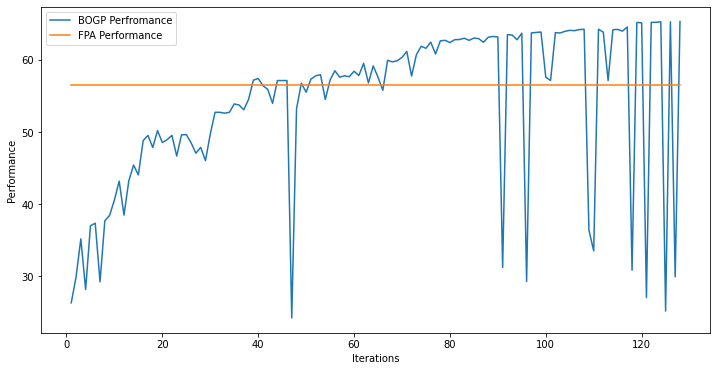

x_next is [ 23.60256054  29.99256603  29.9583816   16.10620615  26.17452328
  17.94797718  29.89224461  22.37274875  29.98932227 -29.78038261
  16.58647325  28.11371767  29.99920203  27.3516387   29.92210225
  20.7117144   26.72713289  21.39237955  19.42710522  22.6260813 ]
f()=65.270338, actual=65.262
59


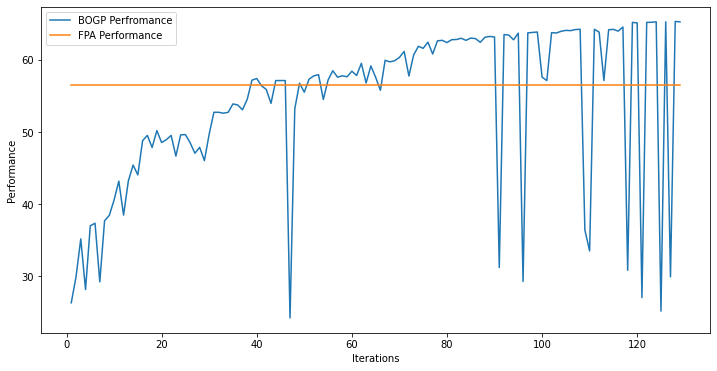

x_next is [ 23.36480326  29.89397329  29.93824863  16.45915294  27.05754343
  18.69011303  29.88503757  23.13301327  29.73534291 -30.74537249
  17.37367646  28.42376016  29.91597767  28.17108114  29.85200196
  19.74150872  27.62125551  21.43576826  19.0560907   23.47976993]
f()=65.201195, actual=65.200
60


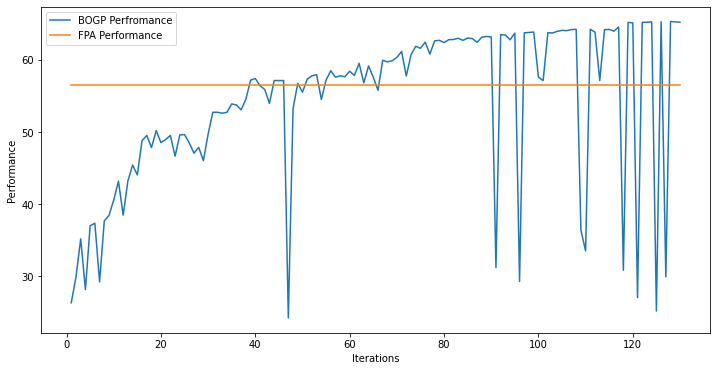

x_next is [ 23.39326899  29.99999999  29.99999998  16.37468569  26.31953102
  18.56037908  29.99999997  22.99522986  29.99327258 -29.99569213
  16.40218075  28.34419709  29.99999996  27.51220541  29.99999999
  20.2934202   27.20147492  21.58810575  19.13372717  23.41757917]
f()=65.328433, actual=65.328
61


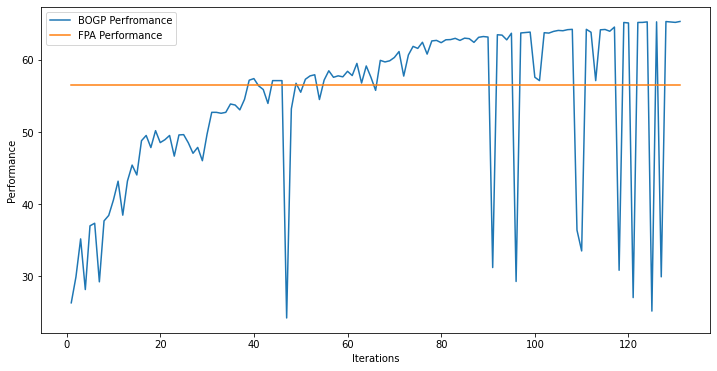

x_next is [ 29.99977251  29.9997543   29.99999173  29.99996334  29.99995132
  29.99979055  29.99978561  29.99999282  29.99967815 -30.99994633
  29.9999187   29.99965843  29.99999559  29.99982344  29.99999404
  29.99993911  29.99974736  29.99969627  29.99997886  29.9996764 ]
f()=54.186658, actual=57.129
62


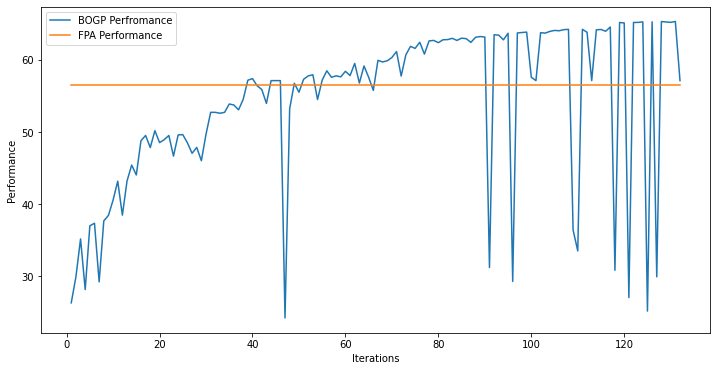

x_next is [ 23.31826487  29.9148498   29.87043916  16.59127401  27.14658255
  18.80387041  29.97959009  23.25172292  29.89840988 -30.06873283
  16.39550513  28.21415189  29.58154914  27.66073186  29.83884031
  20.20850934  27.36930783  21.71027091  19.59821735  23.40192927]
f()=65.219154, actual=65.258
63


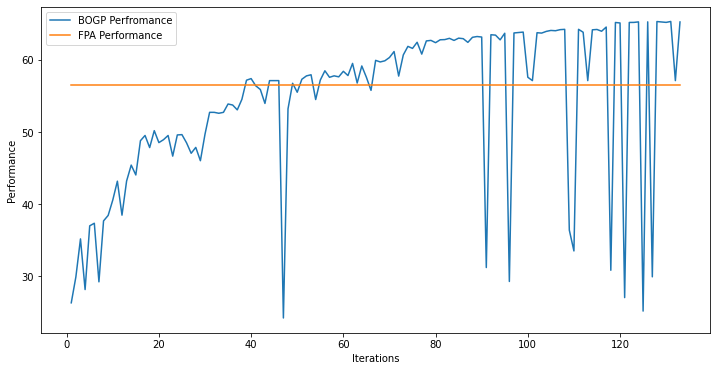

x_next is [ 22.70260443  29.96285272  29.87305532  16.43554148  26.23171913
  18.6246641   29.99384211  22.97783817  29.93402644 -29.47528914
  16.04950295  28.39433892  29.97991345  27.89527505  29.911042
  20.05852872  27.48056538  21.24661493  18.90990758  23.89020417]
f()=65.275691, actual=65.172
64


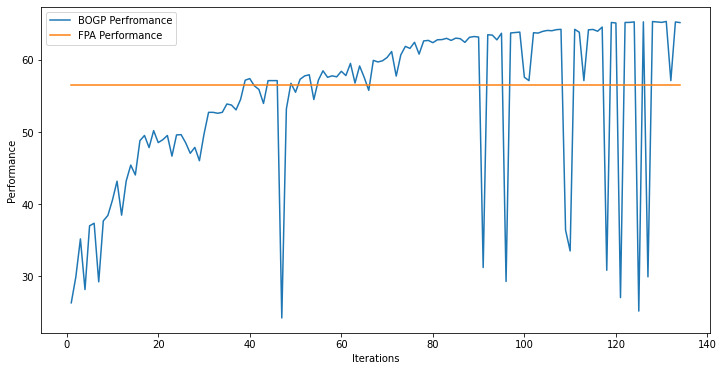

x_next is [ 25.0730971   29.99557062  29.9768837   16.11670645  26.3397442
  18.30039385  29.85899935  23.02771987  29.96578549 -30.60502083
  15.94848486  28.13238658  29.92375706  27.44125159  29.97428463
  20.30752422  27.11945479  22.21359698  19.5126072   23.46811616]
f()=65.365641, actual=65.361
65


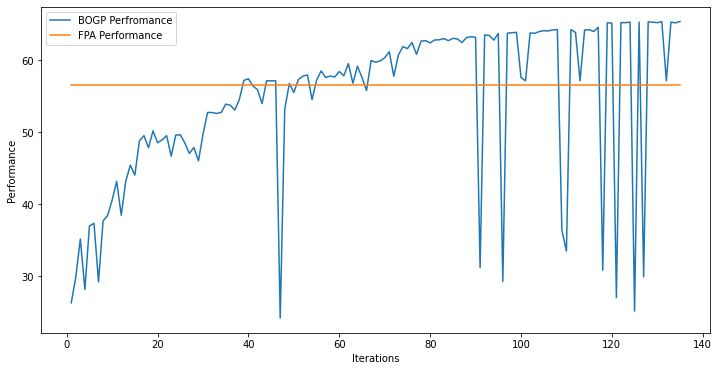

x_next is [ 18.77949393 -30.27516783  17.28168648 -19.40139912  -0.16885953
  -2.40319087  24.3731185   15.22631334  -1.03940695  -2.74613094
   4.82197629  -8.61781632  29.0437205    6.15457882  -0.96346714
   9.90096961 -26.46651201  21.70517317  -3.83076056 -13.83838704]
f()=54.253428, actual=34.393
66


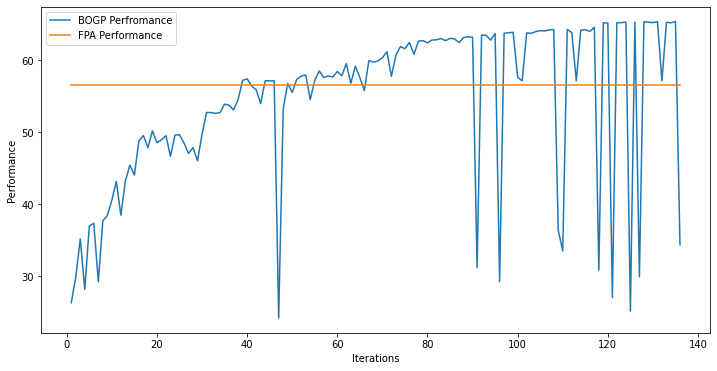

x_next is [  6.13759502 -23.75346637   8.75033664 -26.59468693  23.98074117
   4.16117588  28.01862164 -27.41486413  12.20960446   9.9580696
  16.9410667  -19.34207143   8.72126404  25.20511171  -2.06611718
  19.47216064   1.46630541   2.85933949  -6.06030216  26.90856317]
f()=53.932168, actual=37.118
67


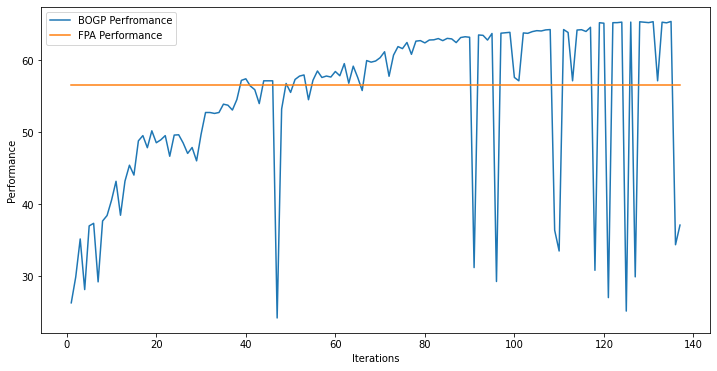

x_next is [ 24.59272646  29.99242699  29.70932235  16.0964757   26.32771095
  18.74418464  29.99338411  23.23106991  29.62697681 -30.64298999
  15.78875102  28.60122852  29.94160417  27.11358968  29.98895246
  19.90020707  26.9993527   21.7700355   19.53923006  22.22404741]
f()=65.337466, actual=65.384
68


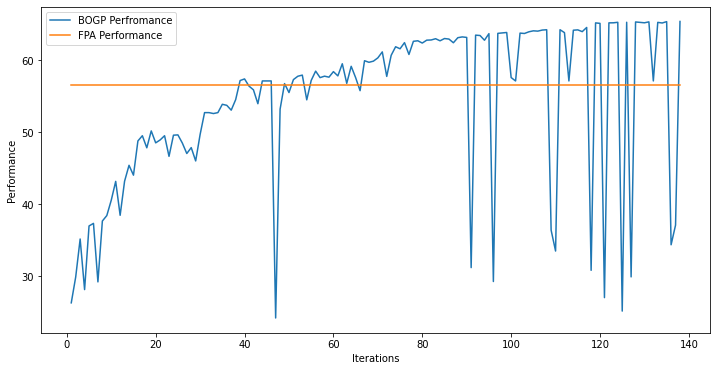

x_next is [ 23.36044705  26.99452227  25.90268435 -11.8227212   17.63678211
  17.11460979  27.31318493  -0.15807778  28.15612374 -14.96427618
   3.29147927 -25.31489082  19.50700727  28.51067854  16.98940346
 -12.80745854  26.69315344  16.10339417  10.81124012   7.93178379]
f()=49.790325, actual=49.016
69


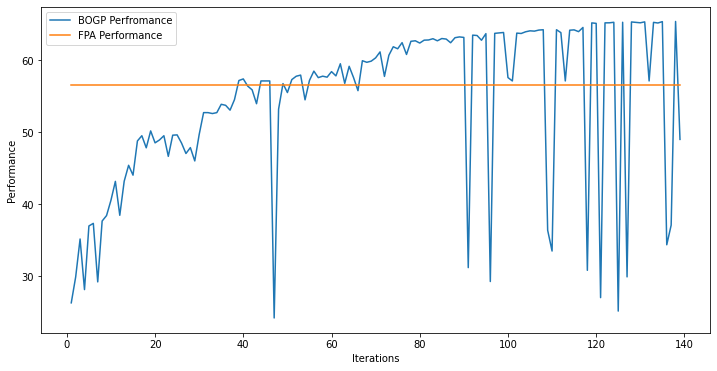

x_next is [ 24.7573019   29.97890047  29.94998195  15.83101641  26.42687981
  18.52400945  29.99574977  22.90671678  29.92063489 -30.83871069
  15.54664277  27.86933303  29.82857011  26.65911779  29.99285025
  19.71195804  27.16923471  21.46752364  19.74874287  22.27047354]
f()=65.388443, actual=65.470
70


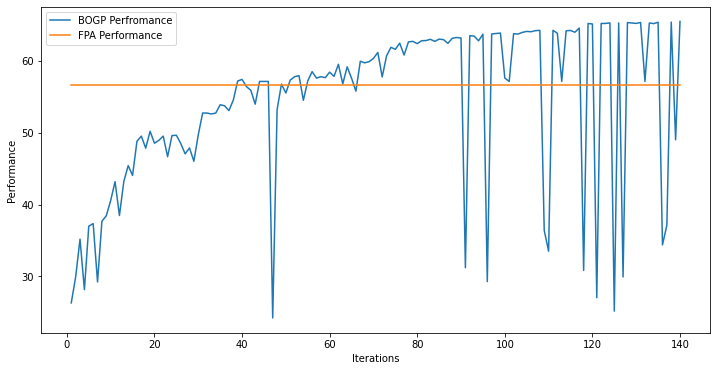

x_next is [ 27.98276234  25.48226714  27.74251202  29.86449102  29.86947883
  28.71028436  29.65679154  28.27124652  29.96260799 -30.96566397
  28.22426545  27.3914055   29.55030866  27.57178937  28.26195976
  29.03545528  28.35541678  29.70333429  29.03144048  29.84292577]
f()=54.305185, actual=55.848
71


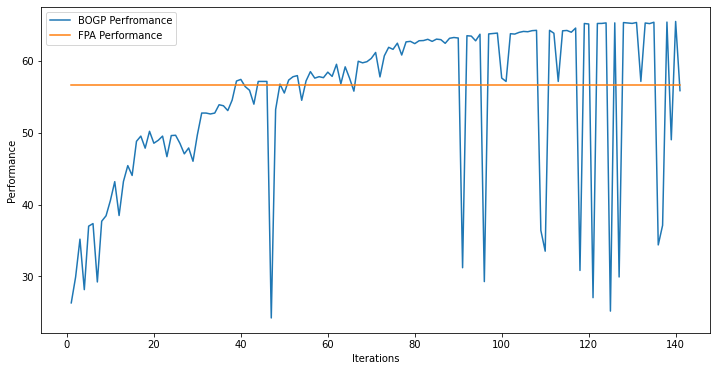

x_next is [ 24.97448891  29.99625294  29.99340927  15.37558399  26.49697148
  18.6284347   29.96190175  22.39035359  29.84694033 -30.81786904
  15.24705624  27.19051402  29.96226072  25.75338857  29.94353042
  18.56582172  27.82595673  21.56572707  19.21395069  22.20273983]
f()=65.498743, actual=65.549
72


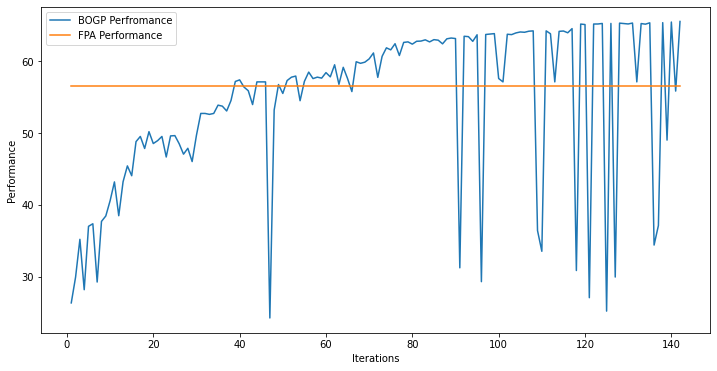

x_next is [ 25.00404896  29.97196622  29.97670528  14.30689897  25.59041977
  18.08312379  29.91455385  21.46350696  29.97967173 -30.6979102
  14.17657607  25.58154664  29.87634231  25.14837543  29.95284437
  16.92953154  27.51617022  21.09312546  18.78402549  21.58474419]
f()=65.468820, actual=65.619
73


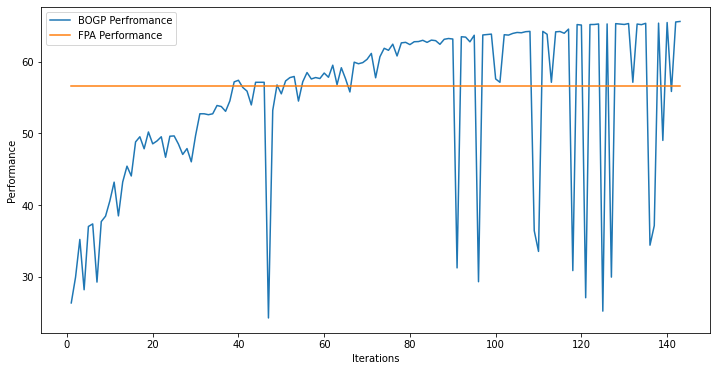

x_next is [ -0.35810001  -1.77602951  21.2326844   -9.75789279  13.3882349
  -8.6375557    4.2797922   -4.26233075   5.66330762  -4.16219155
 -28.16805164 -12.38939101   1.63643121  25.80487567  -1.52178876
   6.77503832  20.82853509  29.77229807  15.16688149  -4.56472104]
f()=54.473875, actual=31.632
74


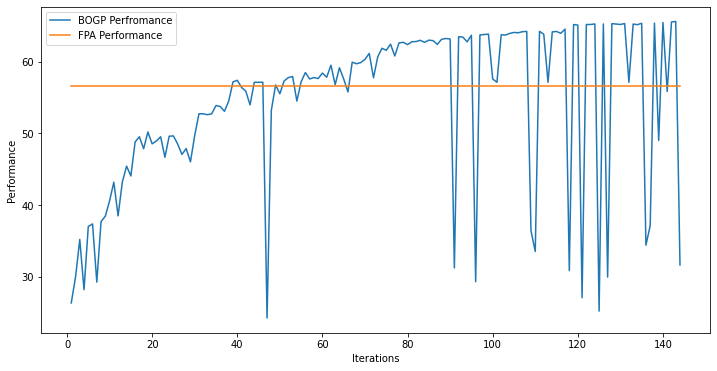

x_next is [ 14.01527714  -3.6302591  -20.67947495   5.94385462 -20.76527455
  10.13190628  11.62756288   2.18404453  27.27980264 -16.48394183
   6.79627111  25.81958764  22.2972423  -10.41654605 -12.43314606
  -5.60000668  -3.70610138 -25.81681664  24.44822989  17.66728648]
f()=54.314848, actual=35.922
75


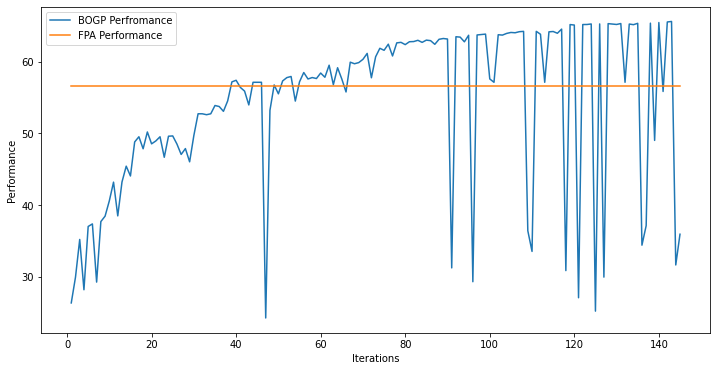

x_next is [ 25.19700242  29.99999998  29.99999993  13.85935393  25.90535596
  18.08943693  29.99999998  20.72250685  29.99999995 -30.99994131
  13.98995155  25.47236899  29.99999993  25.00920965  29.99999999
  16.84409991  27.73055092  20.89801494  19.04588442  21.0959728 ]
f()=65.666162, actual=65.648
76


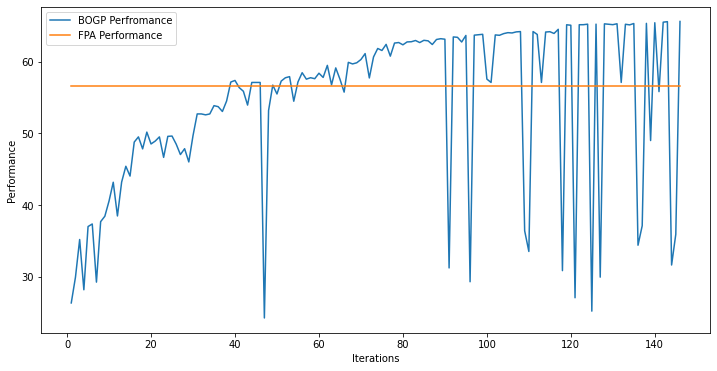

x_next is [ 25.12078275  29.99999999  29.99999997  14.12553814  25.76843311
  18.18410374  29.99999996  21.18909029  29.99999986 -30.84047792
  14.21876953  25.53314663  29.99999991  25.13619302  29.99999999
  17.00410141  27.63098939  21.05499981  18.99092163  21.31104359]
f()=65.653344, actual=65.655
77


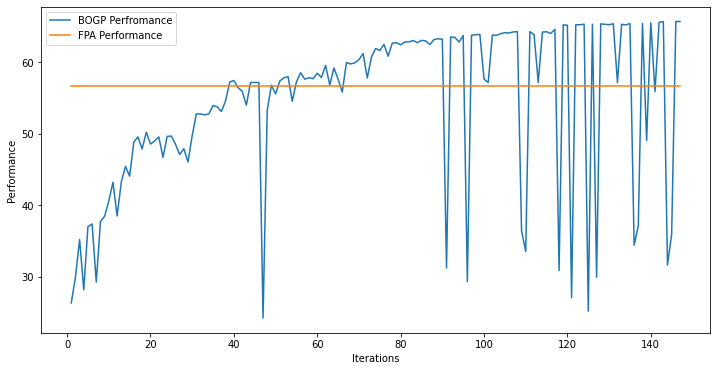

x_next is [ 25.2741605   29.95356792  29.97388106  14.05991427  25.71509329
  17.76076033  29.96334966  20.79914078  29.83087083 -30.37269317
  14.21760034  25.6688796   29.95150802  24.90497209  29.98092782
  17.09261533  27.71665237  21.38663396  18.99061928  21.21836933]
f()=65.613173, actual=65.568
78


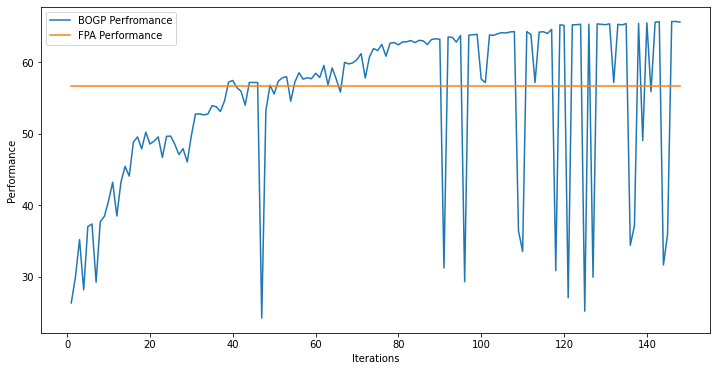

x_next is [ 25.10847626  29.98768013  29.98465946  13.76178478  26.0399422
  18.5065048   29.99379757  21.22264694  29.97176041 -30.97004193
  13.78043834  25.30445158  29.92193181  25.52723761  29.96733918
  16.65789168  27.06678077  20.50404853  18.81913159  21.71045731]
f()=65.650472, actual=65.715
79


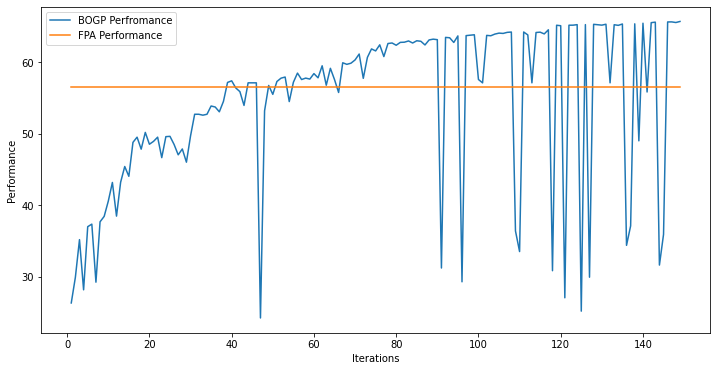

x_next is [ 25.10231065  29.99999999  29.99999996  13.29847119  26.57610675
  18.91783864  29.99999995  21.06151191  29.99999989 -30.99997485
  13.73750661  25.14667975  29.99999996  25.78734566  29.99999997
  16.42347258  26.53310205  20.24535626  19.09550753  21.94072476]
f()=65.754639, actual=65.735
80


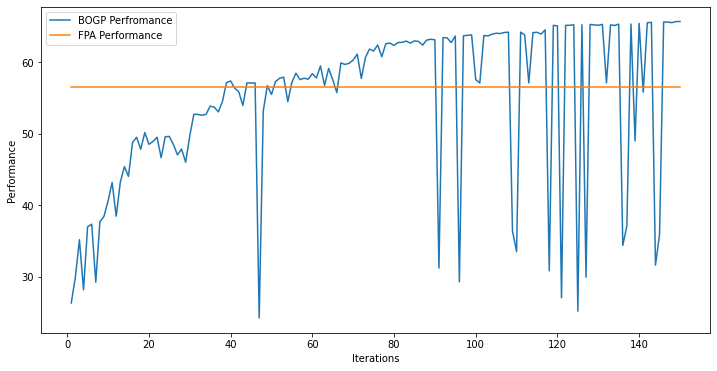

x_next is [ 25.02110972  29.97286746  29.93158441  13.64844077  26.43663985
  18.90822743  29.9424791   21.20725842  29.86771706 -30.7893489
  13.38564371  25.10804006  29.98778975  25.55680105  29.95521838
  16.46859061  26.57665504  20.2578004   18.62734385  21.60450722]
f()=65.700773, actual=65.746
81


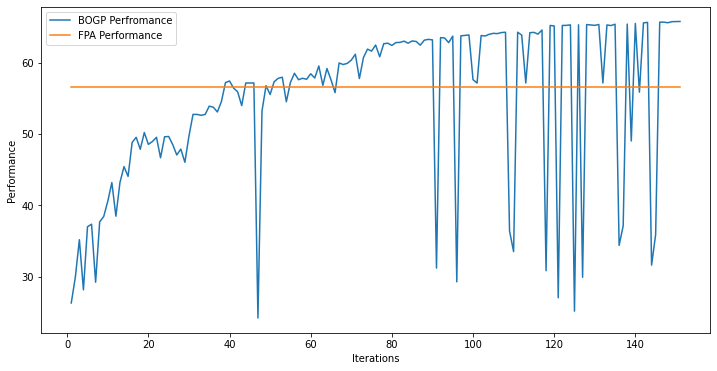

x_next is [ 25.05531645  29.99537529  29.98091982  13.15987487  26.47785785
  19.01143142  29.9995593   20.69419277  29.97110717 -30.77053116
  11.9966447   24.19863504  29.96459204  25.17159632  29.99030931
  16.46160888  26.51275908  20.11075968  18.27874268  20.60221927]
f()=65.774114, actual=65.834
82


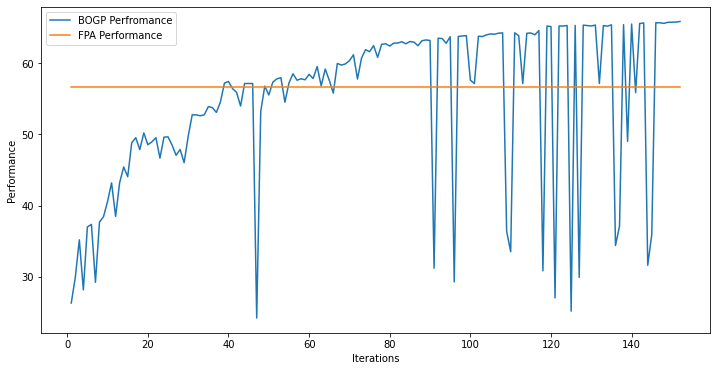

x_next is [ 24.73538042  29.97187563  29.97561016  12.94719284  26.63098038
  19.1762544   29.94517407  20.57399421  29.98804664 -30.48485345
  11.29603027  23.74755226  29.9945879   25.33300713  29.98724363
  16.39828633  26.46279576  19.7093646   18.06145252  20.40615935]
f()=65.829522, actual=65.827
83


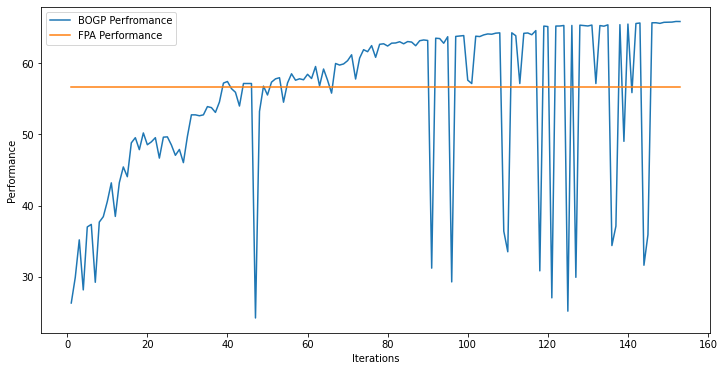

x_next is [ 24.6941327   29.97997651  29.98791579  12.18677701  27.18349998
  18.87534466  29.973144    19.98291453  29.93101137 -30.83056104
  10.92824473  23.58701917  29.99420908  25.1262339   29.99582244
  16.28654969  26.54899563  20.07521325  17.65149863  20.44841555]
f()=65.812817, actual=65.837
84


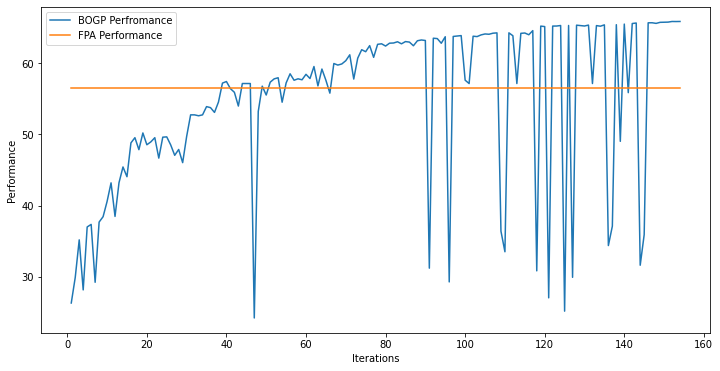

x_next is [ 25.10994339  29.96967456  29.94360624  12.74905288  27.22363003
  18.60383796  29.98316327  20.69408504  29.96625562 -30.85385147
  10.9365385   23.62699126  29.99232779  25.00448013  29.92222017
  16.23907173  26.63975753  19.92432598  17.53435396  20.68430922]
f()=65.821451, actual=65.746
85


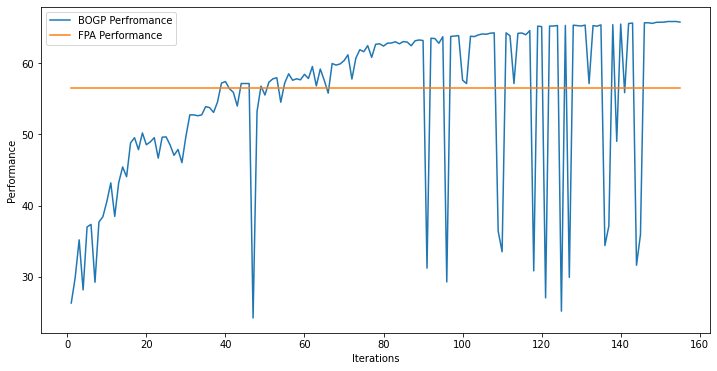

x_next is [ 23.7124738   29.98195326  29.9602721   11.94675575  26.29890506
  19.56482655  29.9945929   19.01134411  29.83625809 -30.98881241
  11.50227453  23.78788265  29.99655401  24.91002745  29.99049736
  16.79432662  26.35569785  20.18524637  17.2884507   20.03727009]
f()=65.891451, actual=65.871
86


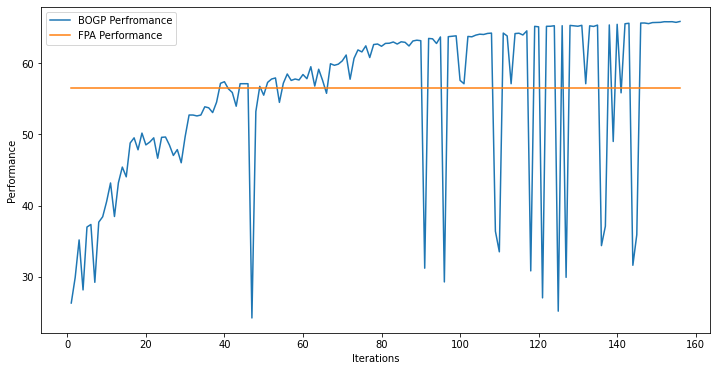

x_next is [ 23.98468247  29.95870552  29.98071316  11.22330468  26.03520682
  19.67804975  29.99033201  19.43815514  29.90518374 -30.37137192
  11.46261594  24.17949081  29.8020631   25.32215137  29.96862282
  16.56421871  26.19236971  21.03341677  17.67304381  19.80604305]
f()=65.857631, actual=66.085
87


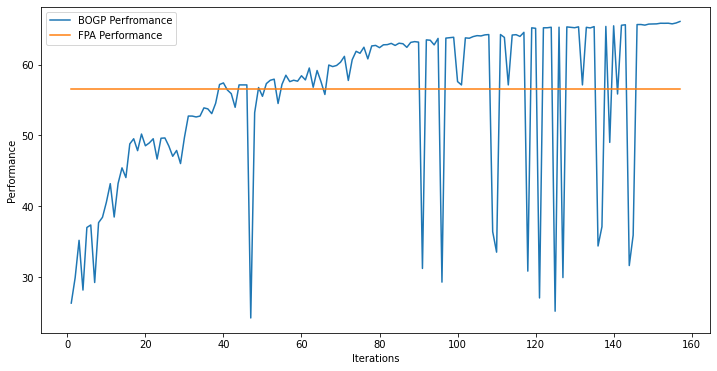

x_next is [ 24.09059116  29.99623932  29.9882903    8.57616545  25.20549539
  19.98541592  29.94116045  19.64958376  29.96278877 -29.65189276
  10.24051748  24.4827432   29.8688256   25.98416848  29.9655308
  15.27419247  25.80027732  21.91567741  17.14359096  18.20744497]
f()=66.229230, actual=66.228
88


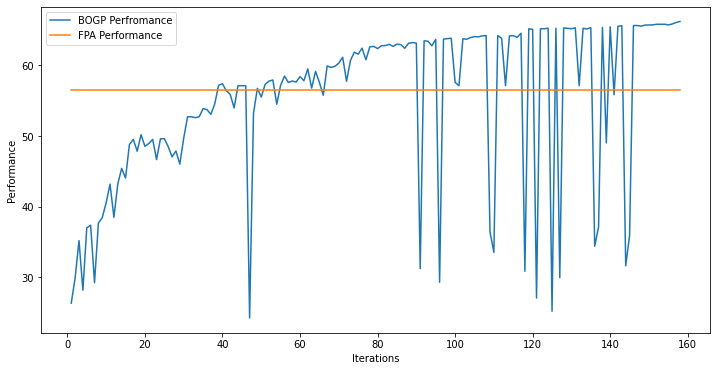

x_next is [ 24.49551976  29.95117244  29.96936581   9.08453369  25.66075022
  20.07516255  29.97783163  20.14092994  29.94826535 -29.69526356
  10.58229092  24.07681435  29.85166768  26.41063736  29.86311301
  15.47623983  26.65944727  21.90808908  17.51977359  18.62484375]
f()=66.200879, actual=66.227
89


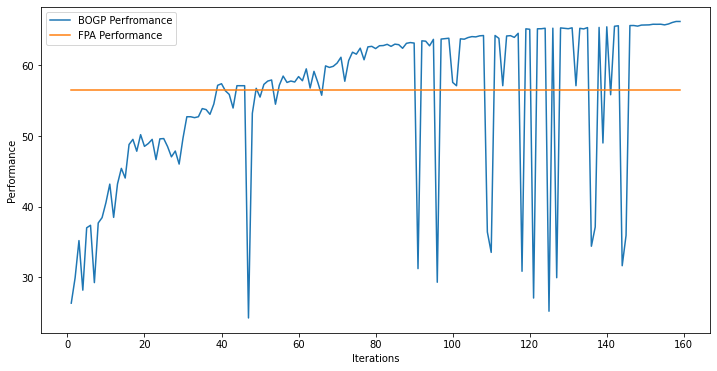

x_next is [ 23.95844762  29.98682417  29.99765958   8.65727937  25.82349858
  20.24306345  29.98667782  19.61609962  29.98708337 -29.6941466
  10.72066764  24.17992425  29.94883096  25.95658402  29.99668385
  15.4282044   26.834266    22.07868286  17.20676927  18.24294649]
f()=66.250250, actual=66.216
90


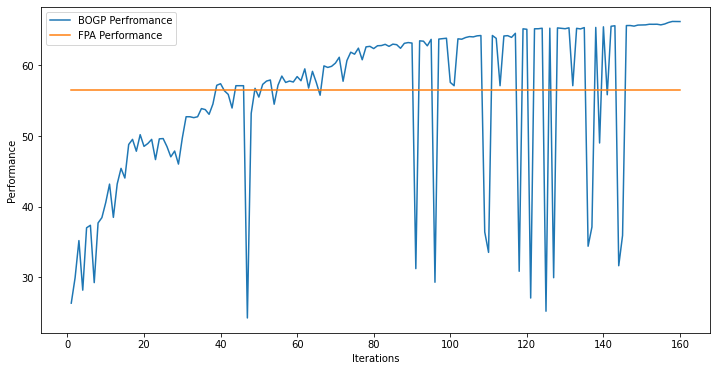

x_next is [ 26.02594167  29.9959881   29.99857886  -0.48637848  14.07501904
  20.99946171  29.98759613  15.91328892  29.98294226 -29.15715898
   3.68450091  18.4565219   25.04968871  25.54207895  29.97619204
  14.7133227   25.86828298  19.38113022  15.07591682  18.08123442]
f()=64.751675, actual=61.782
91


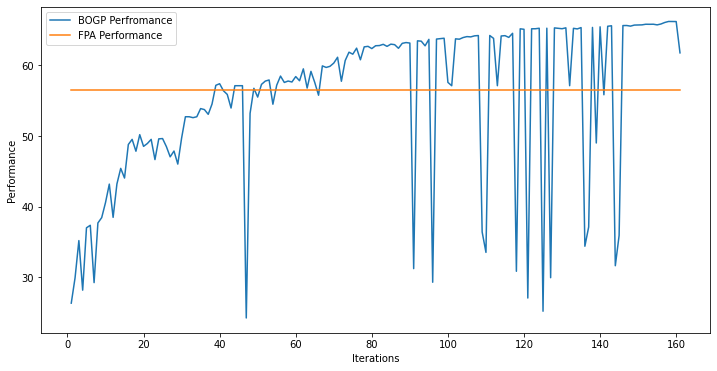

x_next is [ 23.78362046  29.96976117  29.97332932   9.81881933  25.84032059
  19.97562353  29.99081486  20.05676211  29.99999979 -29.44618629
  10.60302685  24.50909857  29.8615843   26.7650605   29.99595294
  15.50616044  25.92259397  22.45035307  17.37460135  18.31222099]
f()=66.275769, actual=66.308
92


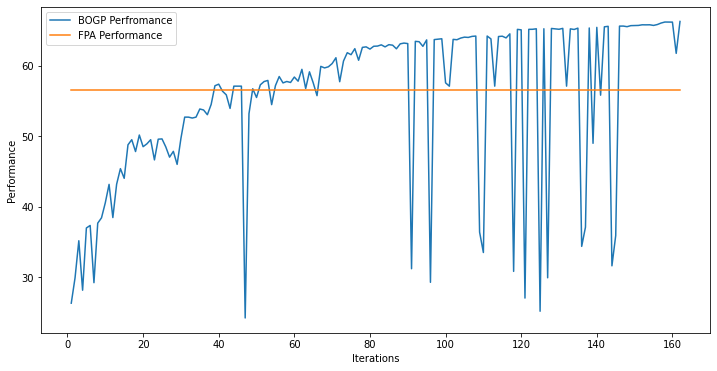

x_next is [ 23.9320698   29.99972311  29.99998324   9.99709553  25.82612464
  19.5741978   29.99990023  20.18142087  29.99993028 -29.84927088
  10.71387006  24.72323377  29.99992525  27.03872063  29.99999787
  15.32313509  25.78101824  22.40960471  17.60248969  18.31393512]
f()=66.338377, actual=66.288
93


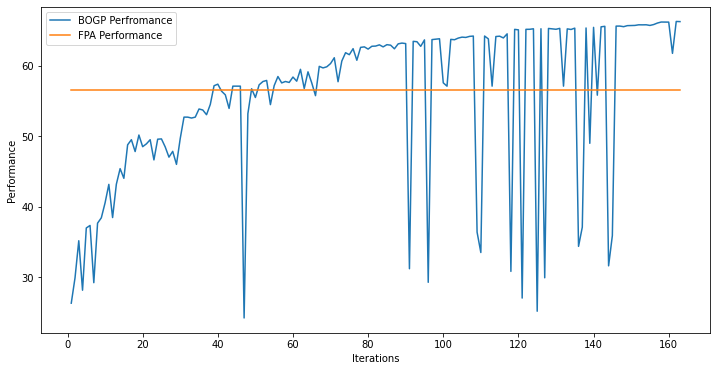

x_next is [ 23.78268691  29.97910144  29.9943895    9.8964485   25.85239917
  20.21723616  29.98172372  19.9969208   29.97480482 -28.71954281
  10.26382702  24.6300848   29.97029387  26.85424309  29.99151022
  15.7560152   25.55055619  22.60675913  17.27306282  18.55638094]
f()=66.320251, actual=66.293
94


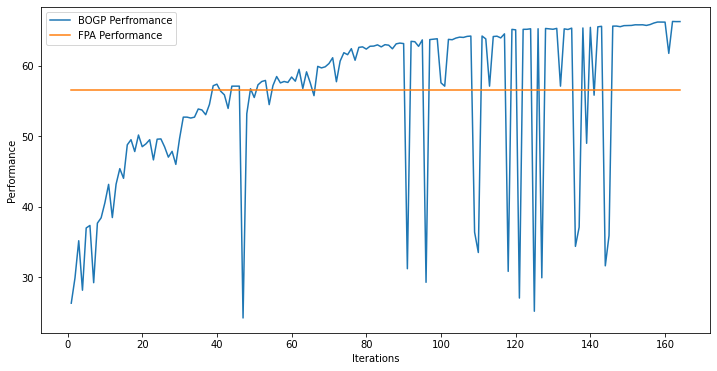

x_next is [ 23.69050896  29.9973872   29.98473317   9.94489537  25.84709848
  20.11840559  29.98830672  20.41146512  29.99998769 -29.17106448
  10.48860406  24.28673349  29.72271881  26.35724411  29.98683234
  15.44366484  26.087176    22.33231977  17.46055006  18.44925947]
f()=66.310273, actual=66.330
95


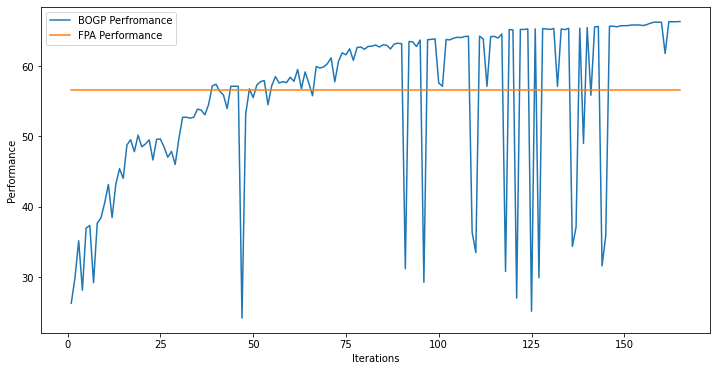

x_next is [ 22.62711098  29.84274062  29.86837388   9.67291913  25.52387648
  20.16785132  29.78151279  21.36487886  29.66574197 -29.64749349
  10.28426346  25.04710953  29.29678671  25.91047604  29.67812142
  14.46739322  25.63712609  21.25683975  17.0684973   18.62062166]
f()=66.092528, actual=66.134
96


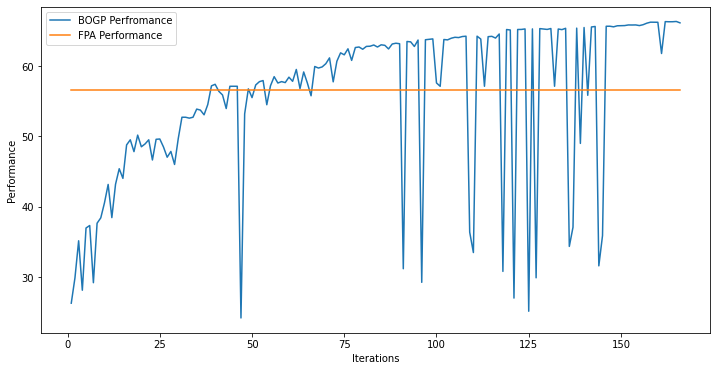

x_next is [ 23.48995918  29.99999998  29.99999992   9.98660281  25.84533298
  20.20910898  29.99999997  20.74640895  29.99999981 -29.17993234
  10.57665056  24.3996944   29.85000691  26.23021639  29.99999996
  15.27912979  25.81965924  22.31306687  17.38940881  18.39973127]
f()=66.342470, actual=66.324
97


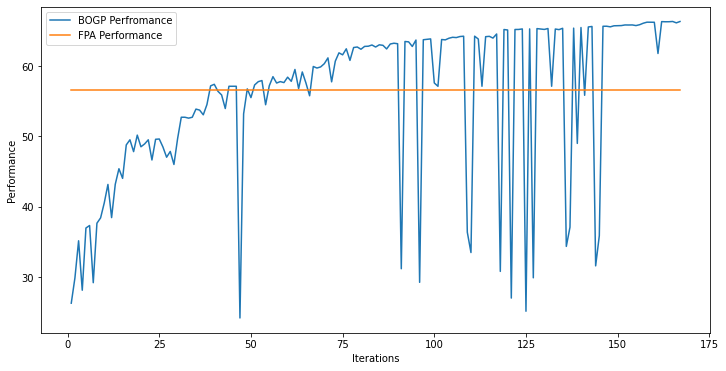

x_next is [ 23.51890962  30.          29.98608748   9.98877939  25.55005612
  20.07039777  30.          20.38261899  30.         -29.00944088
  10.13855804  24.49312742  29.3843694   26.4166785   29.99131466
  15.28707201  26.07313485  22.26759433  17.52871595  18.3890432 ]
f()=66.340501, actual=66.352
98


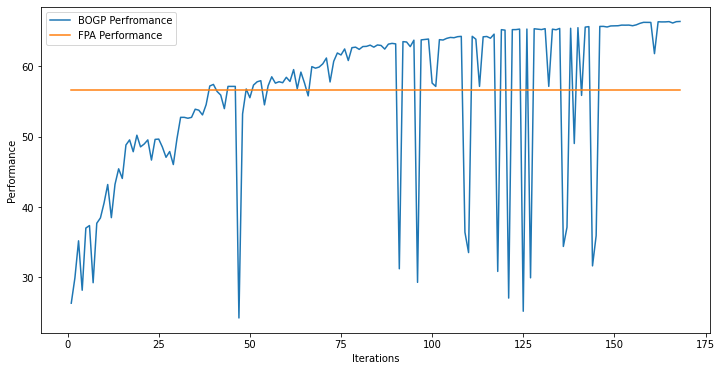

x_next is [ 23.46072391  29.99999997  29.99999998  10.08730291  25.69554212
  20.10259548  29.99999995  20.32288062  29.99999991 -29.09664915
  10.0095557   24.70720476  28.9827174   26.44050535  29.99999998
  15.1094596   26.19191422  22.26594382  17.57085203  18.34023608]
f()=66.362017, actual=66.363
99


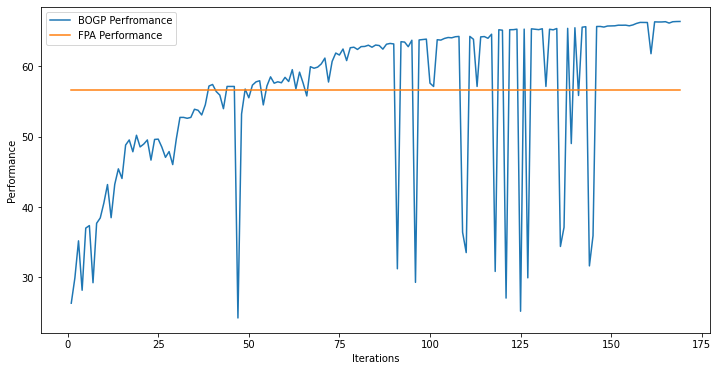

x_next is [ 23.47500312  29.99999995  29.99999998  10.09104772  25.72312521
  20.11669288  29.99999996  20.31659742  29.99999992 -29.10431599
  10.00672243  24.72265771  28.94743438  26.43674025  29.99999993
  15.09587016  26.18853122  22.26873794  17.57004907  18.33609056]
f()=66.363117, actual=66.364
100


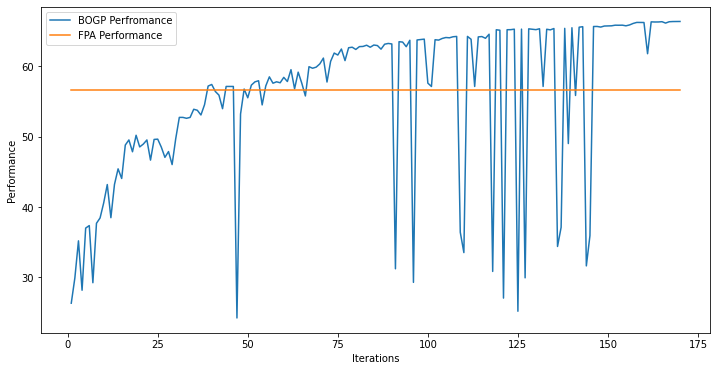

x_next is [ 23.6646098   29.99999998  29.99999995  10.06697313  25.81804908
  20.18728194  29.99995915  20.27745456  29.99993771 -29.03534384
  10.12491723  24.68243728  28.75699047  26.38784533  29.99999996
  15.02210714  26.00282482  22.22590859  17.56592929  18.23808079]
f()=66.367852, actual=66.376
101


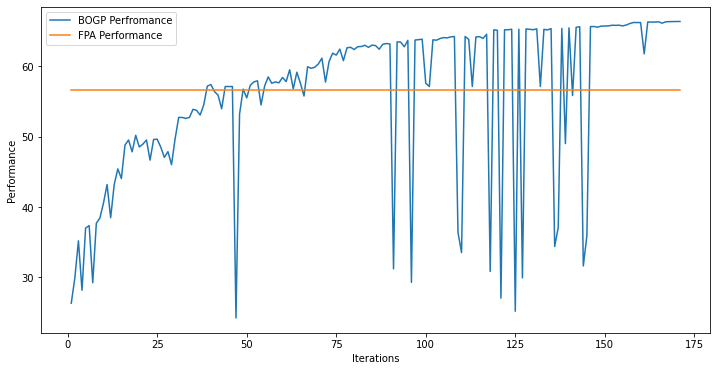

x_next is [ 23.74415804  29.99999998  30.           9.91959403  25.99174784
  20.12964174  30.          20.12053255  29.89720708 -28.58492688
  10.67024663  24.16560854  28.28737741  26.80226673  29.99999998
  14.98948812  25.56739625  21.88051271  17.49682393  18.3152645 ]
f()=66.366102, actual=66.363
102


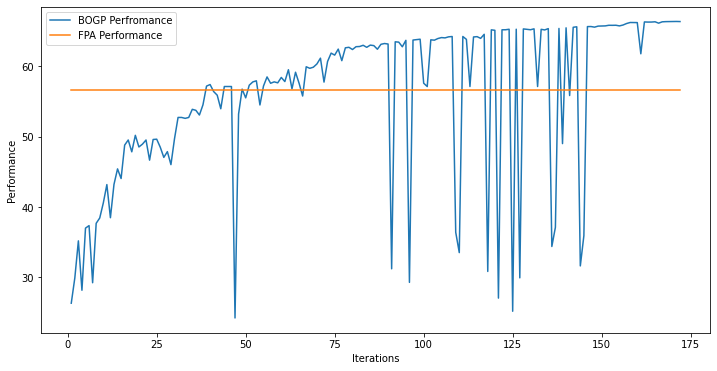

x_next is [ 29.99988856  29.99976168  29.99977765  29.99970378  29.99973422
  29.99993686  29.9999578   29.99959341  29.99981257 -30.99995908
  29.99958423  29.99980502  29.99971366  29.99984337  29.9999063
  29.99999457  29.99984685  29.99980028  29.99993289  29.99962119]
f()=56.026455, actual=57.129
103


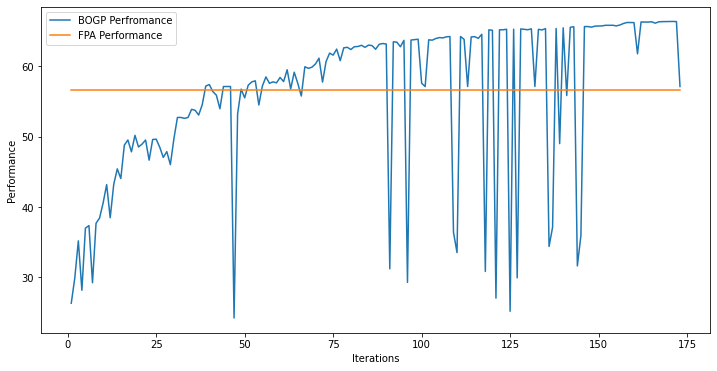

x_next is [ 23.77643191  29.99685166  29.99970902   9.92115379  25.73948433
  20.11740809  29.99900292  20.2857699   29.98490647 -28.75076374
  10.38624286  24.43398572  28.52032922  26.4600533   29.986525
  14.84777588  25.72984028  22.08009643  17.46419548  17.95221554]
f()=66.381257, actual=66.385
104


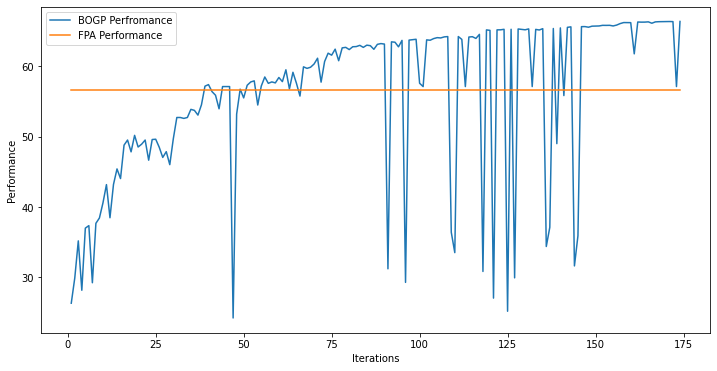

x_next is [ 23.70303388  29.99800703  29.9777448    9.89213622  25.93880238
  19.9006105   29.97929795  20.15872163  29.99894619 -28.61664367
  10.54342548  24.65086194  28.4694191   26.44201398  29.98901114
  14.96708258  25.9276725   21.99840308  17.55884354  17.86742692]
f()=66.380851, actual=66.354
105


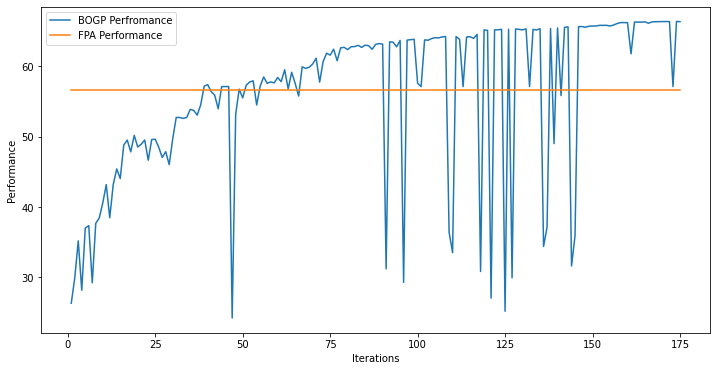

x_next is [ 0.410607   -0.41139019  0.33168277 -1.30237599 -0.48697629  0.03574422
  0.95380813  0.2424342   1.19669467 -0.09313662  0.16086686  0.40579734
 -0.11357369  0.97440851 -0.907017    0.24704006 -0.19349074  0.37355172
  0.38258578  0.12643022]
f()=26.519941, actual=26.548
106


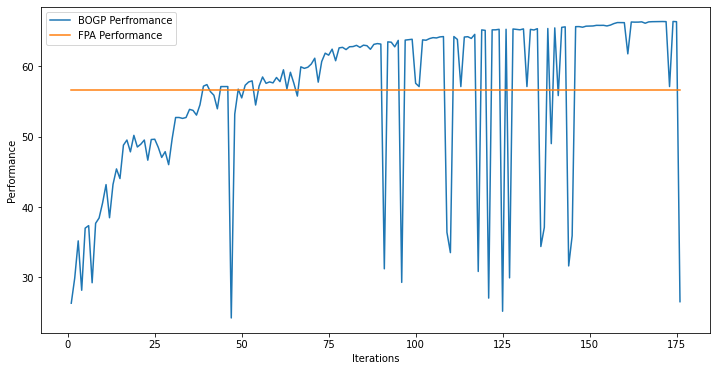

x_next is [ 23.7543252   29.99999997  29.99999998  10.24188295  25.46497421
  20.4063884   29.99999995  20.09463287  29.99999986 -29.02003998
  10.09650544  23.89173263  28.51175446  26.56285717  29.99999996
  14.26117862  25.69482386  22.36808997  17.26015784  17.95541295]
f()=66.414501, actual=66.418
107


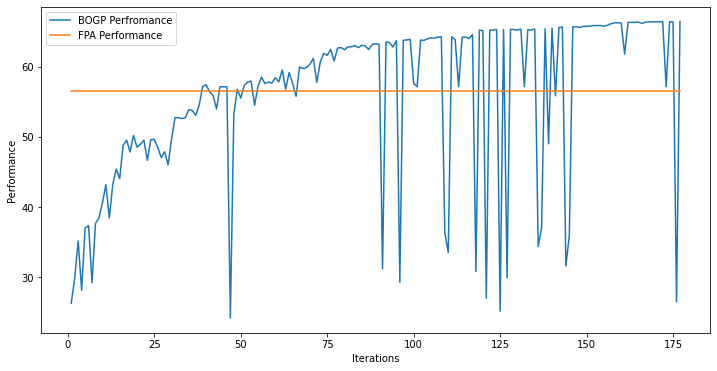

x_next is [ 23.73444786  29.99786606  29.99934034  10.26282535  25.49335006
  20.35723352  29.99941828  19.95821439  29.99611216 -29.04717549
  10.07557062  23.8476523   28.64893151  26.53189132  29.99261812
  14.01236897  25.62475401  22.36915449  17.23209433  17.89700763]
f()=66.415554, actual=66.413
108


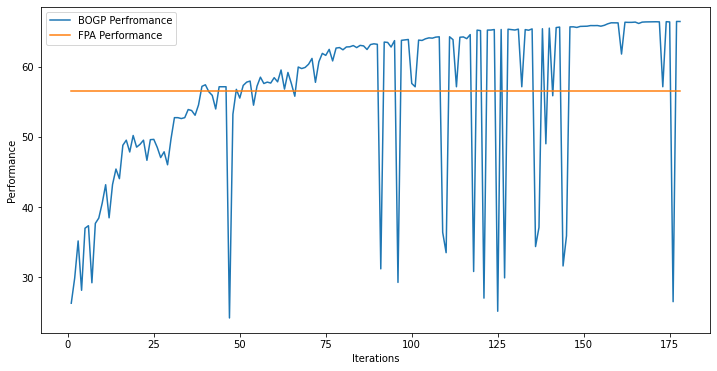

x_next is [ 23.76950898  29.9994934   29.99778895  10.22725807  25.35716691
  20.31132306  29.98739855  20.20176925  29.99741693 -29.02891042
  10.0217344   23.83270693  28.43965935  26.63058239  29.99299815
  14.33860755  25.67311815  22.43250749  17.14633592  17.86836545]
f()=66.414643, actual=66.415
109


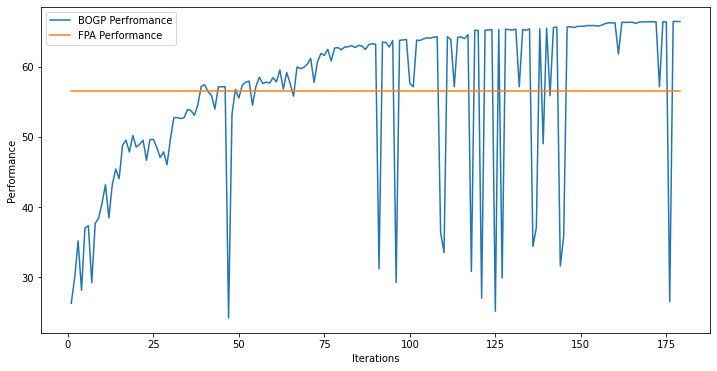

x_next is [ 23.75765537  29.99999982  29.99999958  10.2787662   25.41053169
  20.43770866  29.99999985  20.12646762  29.99999969 -29.05120084
  10.08357654  23.84621791  28.44410077  26.58543766  29.99999984
  14.28046669  25.73965755  22.40187612  17.20663596  17.93826297]
f()=66.418597, actual=66.417
110


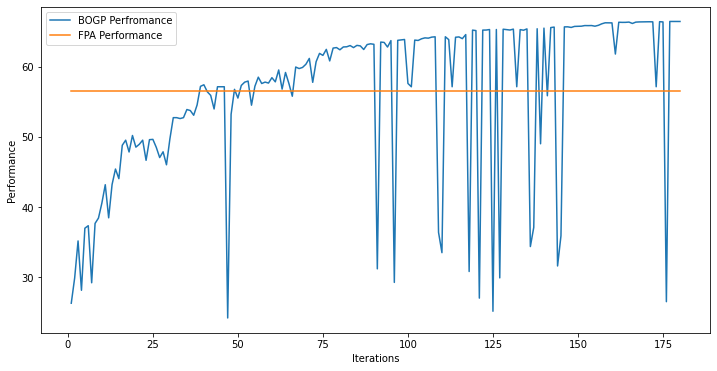

x_next is [ 23.71465866  29.99999994  29.99989021  10.15384466  25.52765431
  20.29371131  29.99999987  20.1394344   29.99974083 -28.99544948
   9.95278805  23.79241762  28.48135146  26.57691085  29.99999993
  14.30338636  25.57292422  22.46527144  17.37107928  17.94059195]
f()=66.420525, actual=66.421
111


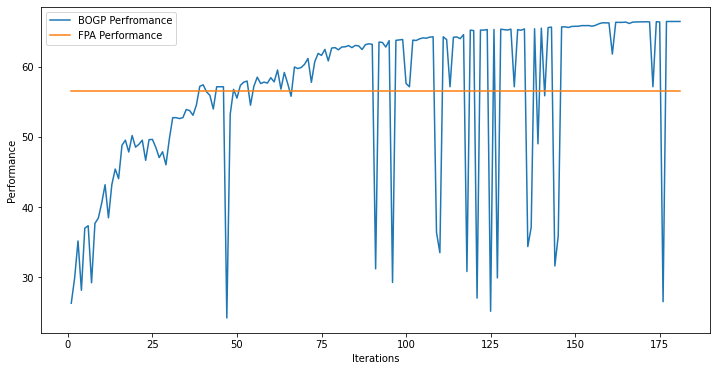

x_next is [ 23.70834776  29.99999993  29.99999992  10.1486663   25.53365824
  20.29388604  29.99999981  20.13911175  29.99999986 -28.99802802
   9.94464982  23.78152557  28.4759875   26.57454038  29.99999994
  14.30397519  25.56718284  22.47419766  17.38485873  17.9353531 ]
f()=66.420868, actual=66.421
112


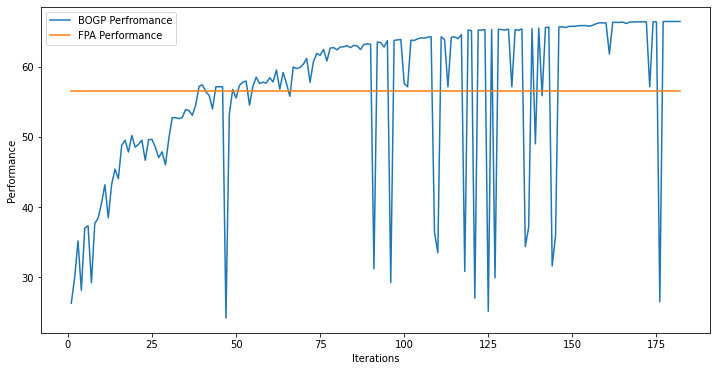

x_next is [ 23.58380814  29.99999998  29.99999997  10.13225743  25.50295091
  20.46730716  29.99986618  20.07308543  29.99999992 -29.1182707
   9.93310651  23.69171303  28.47963979  26.60364118  29.99990643
  14.3730997   25.47599487  22.44167652  17.60384139  17.52744908]
f()=66.428468, actual=66.430
113


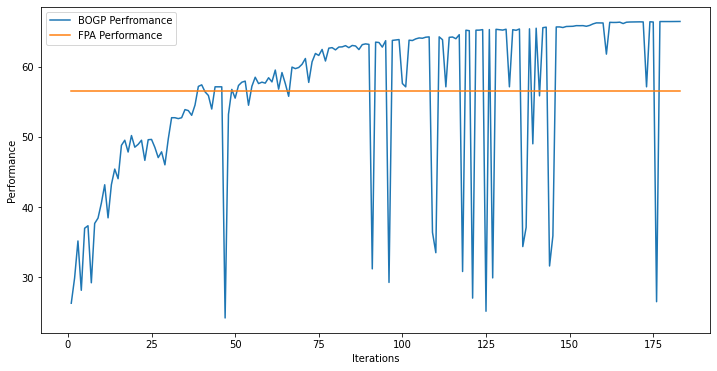

x_next is [ -9.45850072   2.17355797 -29.81810858   3.3684954  -18.59594349
  28.97916046 -29.15454824 -15.17089275  20.81990951  -8.3202533
 -20.86815343  25.22586843  29.57397168  28.83016997  27.72586056
  18.40023365  17.49550509   2.56801594 -28.73015598 -17.95828205]
f()=56.381819, actual=33.353
114


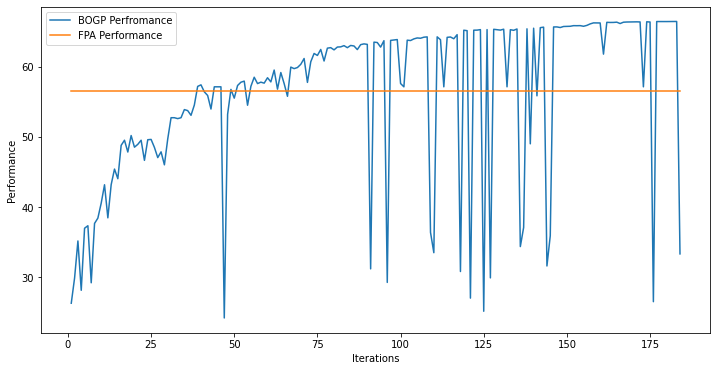

x_next is [ 23.57462086  29.99999996  29.99999995  10.14708967  25.50450177
  20.5001675   29.99999996  20.06338801  29.99999991 -29.12754915
   9.90148895  23.6831049   28.49681178  26.63536471  29.99999984
  14.38431755  25.46219694  22.39807448  17.62422639  17.46586005]
f()=66.430542, actual=66.430
115


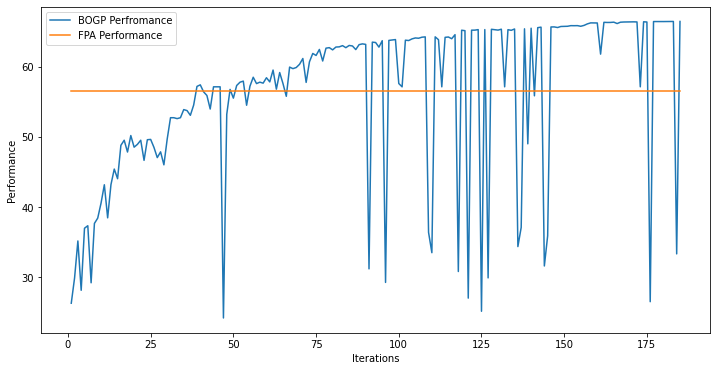

x_next is [ 23.55660038  29.99998725  29.99999988  10.122419    25.43676682
  20.46558191  29.99996491  20.05195042  29.999955   -29.15170961
  10.04675626  23.71308089  28.46674344  26.5708075   29.99980274
  14.38489472  25.44481692  22.52131144  17.64181286  17.50912163]
f()=66.431074, actual=66.433
116


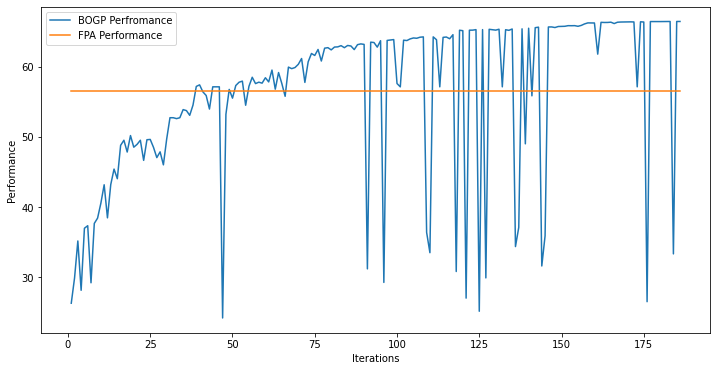

x_next is [ 23.08836556  30.          30.          10.2596154   26.44598466
  20.13575568  30.          19.5861203   30.         -29.05358871
  10.21668097  23.61814807  28.84238451  26.74343365  30.
  13.31500906  25.61442315  22.6653055   17.86021279  17.12814284]
f()=66.475959, actual=66.325
117


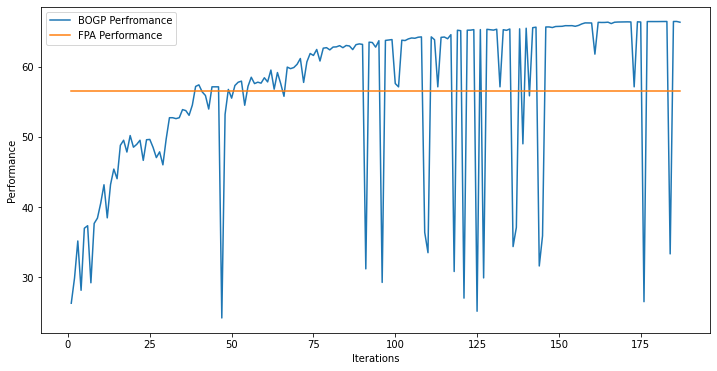

x_next is [ 23.61051996  29.99999956  29.99999992  10.1719306   25.19797904
  20.50810624  29.99996282  19.9937575   29.99998088 -29.21820332
  10.05546879  23.74987869  28.44609253  26.48565233  29.99997408
  14.47674149  25.2831693   22.49770549  17.6820899   17.5839945 ]
f()=66.435973, actual=66.437
118


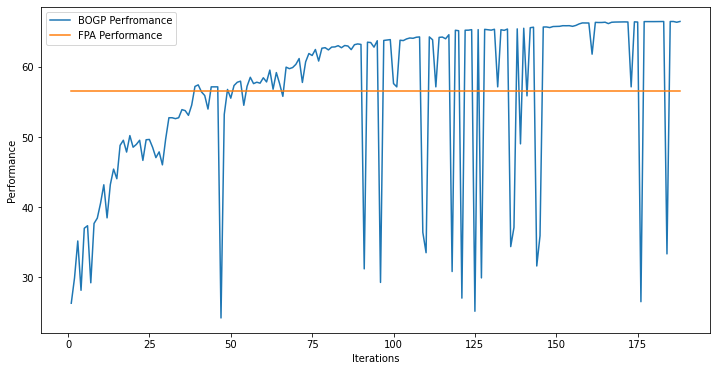

x_next is [ 23.62041504  29.99999995  29.99999989  10.19545746  25.16289106
  20.50876765  29.99999972  19.97623192  29.99982414 -29.22690055
  10.03604713  23.75439415  28.43284626  26.45581564  29.9999999
  14.48628468  25.24436604  22.48175938  17.6912271   17.59928708]
f()=66.437395, actual=66.437
119


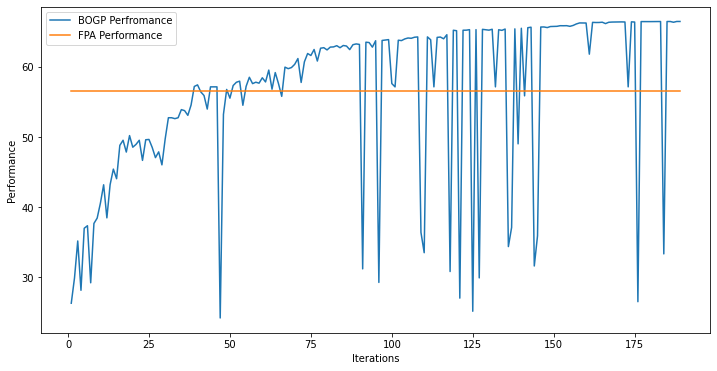

x_next is [ 23.6264209   29.99999994  29.99992643  10.16146642  25.1580829
  20.52838181  29.99999986  19.98894036  29.99977098 -29.22405826
  10.05483126  23.74953173  28.45984184  26.49966211  29.99999986
  14.48418572  25.26922935  22.49189227  17.69314031  17.61022419]
f()=66.437341, actual=66.438
120


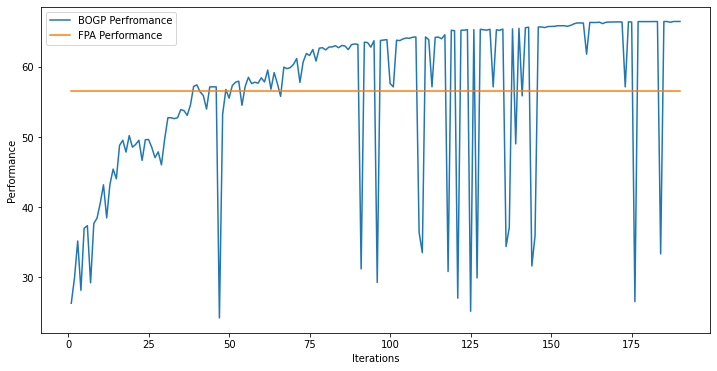

x_next is [ 23.65687434  29.99999993  29.9999998   10.10925589  25.08585978
  20.57726427  29.99999977  19.99633665  29.99996589 -29.21192704
  10.04580057  23.74780461  28.48567022  26.57129968  29.9999997
  14.44013302  25.26646298  22.49464173  17.74299267  17.64969047]
f()=66.438465, actual=66.438
121


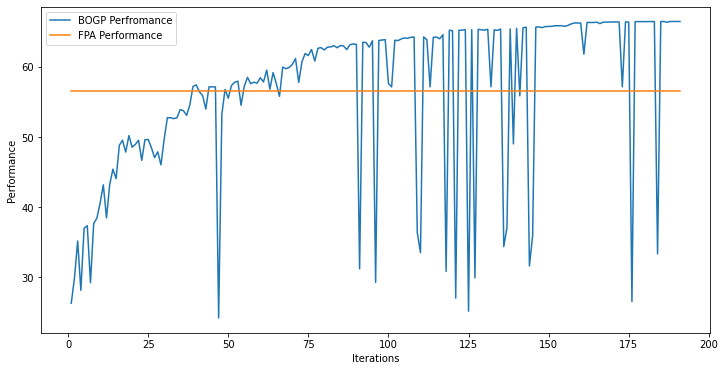

x_next is [ 23.65612716  29.99999983  29.99999991  10.11018081  25.08821633
  20.57702112  29.99997465  19.9950171   29.99993515 -29.21427881
  10.04751304  23.74548124  28.48726637  26.57001556  29.9999999
  14.44528139  25.26594739  22.49454161  17.73984216  17.65033129]
f()=66.438424, actual=66.438
122


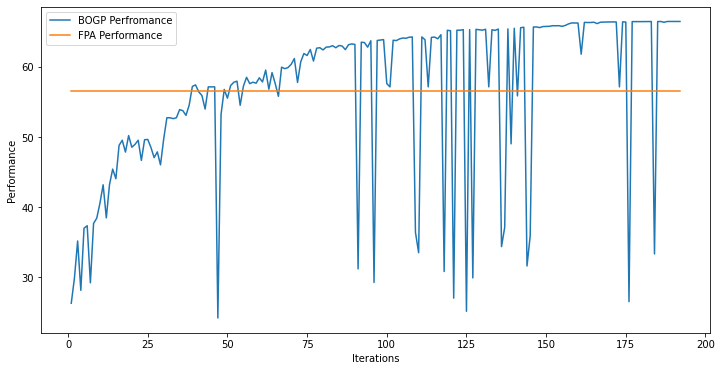

x_next is [ 23.64358562  29.99999997  29.99999993  10.0882895   25.10606738
  20.5989163   29.99972505  19.95541022  29.99997816 -29.25768414
  10.06056211  23.66669775  28.51117027  26.59453465  29.99999992
  14.48392054  25.2333638   22.50138417  17.71601786  17.68497417]
f()=66.438916, actual=66.440
123


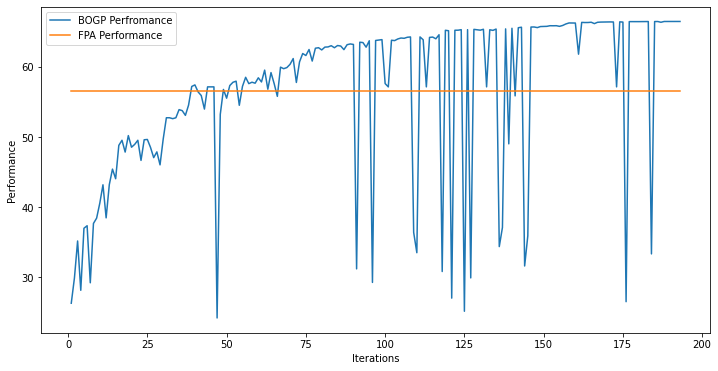

x_next is [ 23.54552663  29.99999993  29.99999985   9.98392414  25.12974118
  20.62229355  29.99997251  19.87028272  29.99999985 -29.34332029
  10.04216813  23.54738321  28.41722031  26.65049757  29.9999999
  14.41968628  25.12022046  22.49103197  17.66770217  17.718301  ]
f()=66.442400, actual=66.448
124


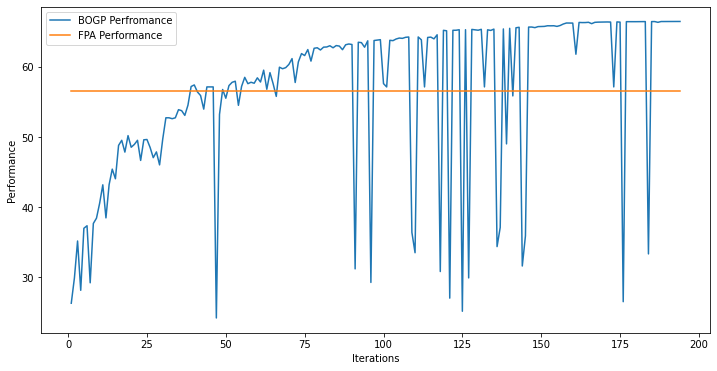

x_next is [ 23.32804951  29.99999987  29.99999994   9.79445521  25.11986205
  20.66314873  29.99999987  19.80799853  29.99988431 -29.47776426
   9.99120734  23.60197602  28.18830315  26.70613773  29.99999058
  14.2976614   24.98953691  22.40416686  17.54134716  17.70984794]
f()=66.453470, actual=66.460
125


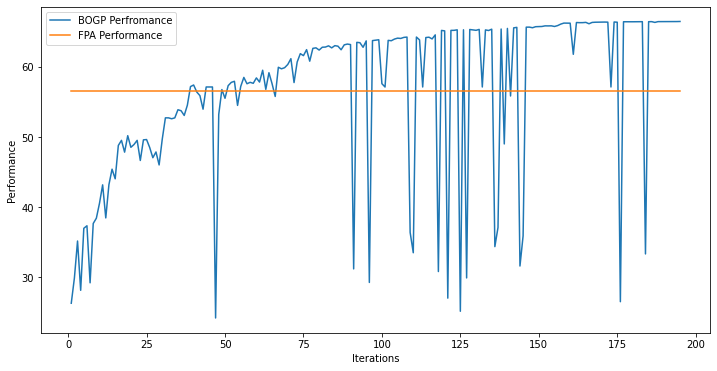

x_next is [ 23.16501086  29.99999994  29.99992867   9.68230454  25.10122388
  20.73511312  29.9999999   19.76340309  29.99999979 -29.581091
   9.9177155   23.71871848  28.03882345  26.73933181  29.99999978
  14.22448643  24.90918007  22.37183372  17.45530333  17.68018938]
f()=66.463175, actual=66.466
126


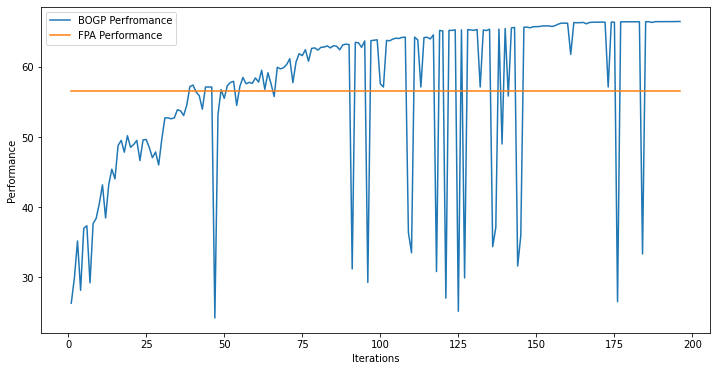

x_next is [ 23.07585613  29.99999998  29.9999998    9.63268259  25.09628409
  20.82626424  29.99999995  19.6906787   29.99996551 -29.6353739
   9.81973333  23.80778719  27.9489107   26.76725529  29.99986999
  14.17811594  24.83175088  22.42531241  17.40174594  17.63663764]
f()=66.467941, actual=66.470
127


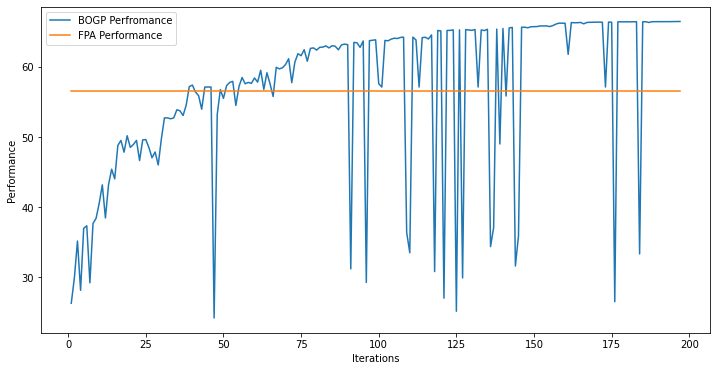

x_next is [ 23.07045623  29.999975    29.99999992   9.61927963  25.11055965
  20.89837324  29.99999988  19.61049893  29.99999991 -29.62133149
   9.73933858  23.84181898  27.91869532  26.78439264  29.9998354
  14.16276469  24.76774191  22.51912267  17.366066    17.59996782]
f()=66.470384, actual=66.470
128


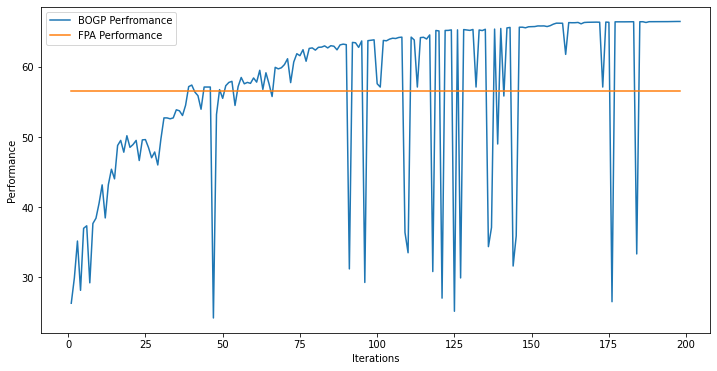

x_next is [ 23.06871511  29.99999994  29.99999987   9.61960246  25.10980092
  20.89741175  29.9997686   19.61329146  29.99998502 -29.62440888
   9.74127123  23.84195399  27.91856027  26.78471464  29.99999627
  14.16293666  24.7687366   22.51677818  17.36791071  17.60028833]
f()=66.470347, actual=66.470
129


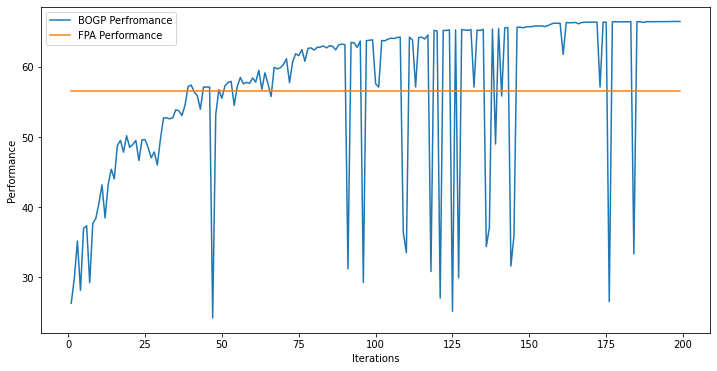

x_next is [ 23.07700261  29.9999622   29.99998559   9.64022374  25.10101701
  20.90870808  29.99992265  19.62085954  29.99971745 -29.64247457
   9.71472401  23.81545136  27.87066539  26.78263077  29.99990882
  14.10917325  24.76888917  22.52766378  17.37380762  17.58762601]
f()=66.470539, actual=66.471
130


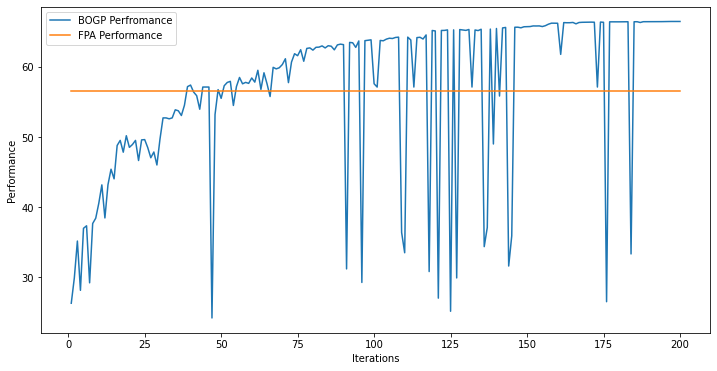

x_next is [ 23.05317205  29.99999994  29.99999985   9.66321207  25.10492516
  20.92787234  29.99997026  19.67493934  29.99959155 -29.81665064
   9.72050632  23.82718797  27.86115356  26.82865752  29.99993971
  14.11317549  24.722464    22.54989453  17.43925204  17.57130785]
f()=66.471934, actual=66.470
131


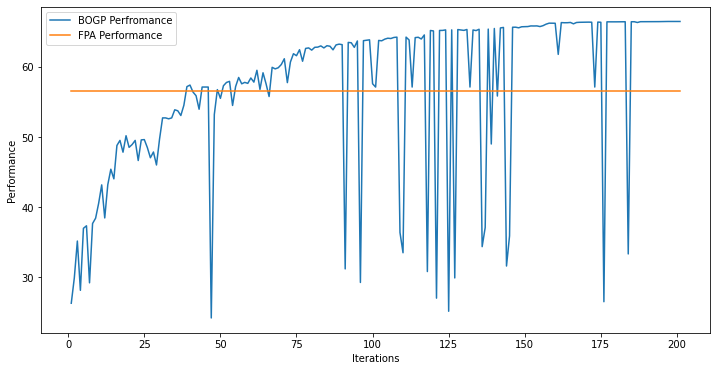

x_next is [ 21.38706735  30.          30.           9.44913477  30.
  17.21796343  30.          13.41723315  30.         -31.
   9.84294582  30.          30.          29.36217965  30.
   6.65109991  24.24079075  23.73205655  14.30344349  11.52238468]
f()=67.968945, actual=59.629
132


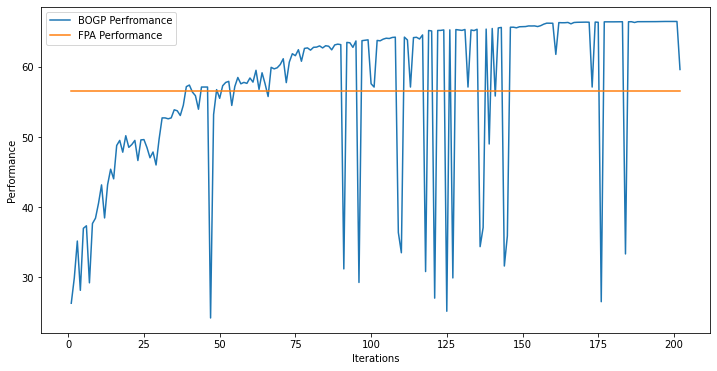

x_next is [ -3.09362537  28.74929499 -28.35600206 -16.80269866 -29.92535852
  25.73671953  20.16595145   0.71304558  20.09234733 -21.86200172
   6.46526432 -23.87229615 -25.87326035 -28.62377323 -22.23045507
  29.45808063 -14.35575014  -8.24641223  12.58281639   9.7032873 ]
f()=57.130945, actual=28.570
133


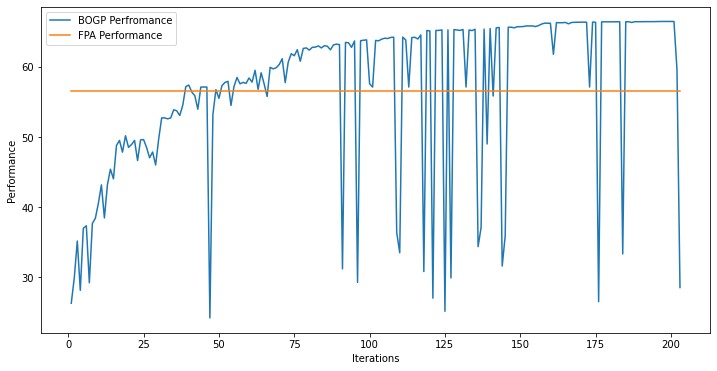

x_next is [ 22.93134323  29.99999994  29.99999988   9.65223478  25.05242532
  21.08968141  29.99988914  19.74362794  29.99997858 -29.65455966
   9.67590545  23.66012236  27.85297139  26.71676169  29.99993879
  14.20695173  24.75185815  22.60052825  17.48373116  17.68894128]
f()=66.475124, actual=66.476
134


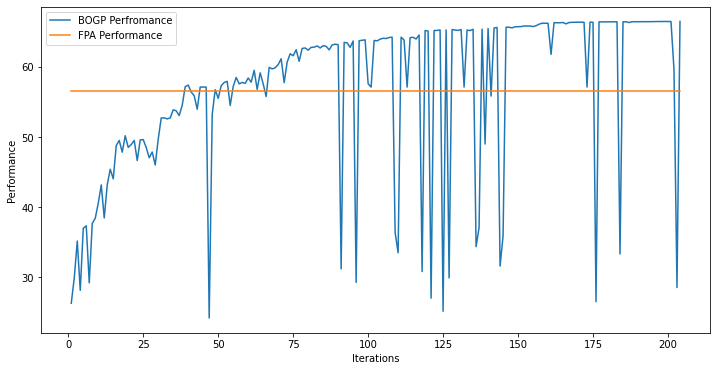

KeyboardInterrupt: ignored

In [18]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(200):
  x_next = opt_acquisition(X, y, model, X.shape[0]+1)

  np.save("/content/drive/MyDrive/trainingx_BOGP_6.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_6.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_6.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)
  
  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()


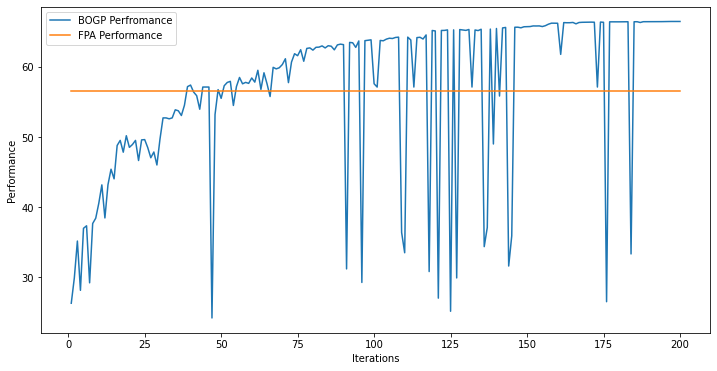

P_max = 30.000, Optimal_SE = 66.471
P_max = 30.000, Optimal_SE_FPA = 56.571


In [12]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,201),y[0:200])
pyplot.plot(np.arange(1,201), y_FPA[0:200])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

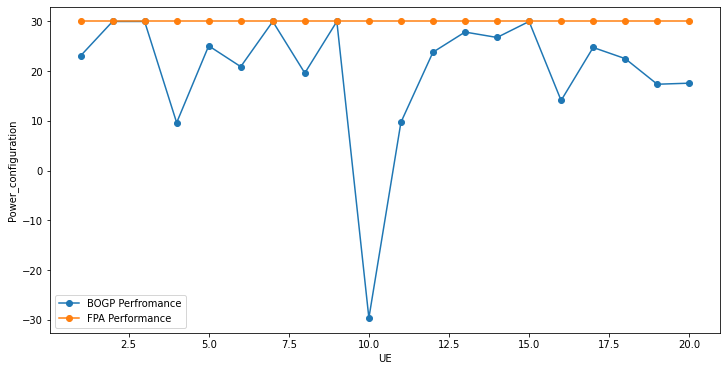

Power_configuration_BOGP is [ 23.07700261  29.9999622   29.99998559   9.64022374  25.10101701
  20.90870808  29.99992265  19.62085954  29.99971745 -29.64247457
   9.71472401  23.81545136  27.87066539  26.78263077  29.99990882
  14.10917325  24.76888917  22.52766378  17.37380762  17.58762601]


In [13]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:], '-o')
pyplot.plot(np.arange(1,21),X_FPA[:], '-o')
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

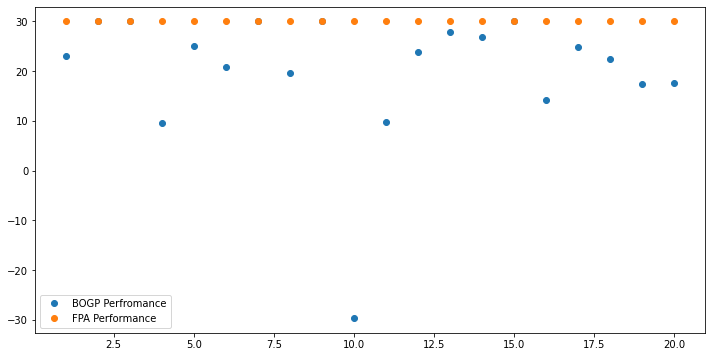

Power_configuration_BOGP is [ 23.07700261  29.9999622   29.99998559   9.64022374  25.10101701
  20.90870808  29.99992265  19.62085954  29.99971745 -29.64247457
   9.71472401  23.81545136  27.87066539  26.78263077  29.99990882
  14.10917325  24.76888917  22.52766378  17.37380762  17.58762601]


In [14]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])